Using this [Kaggle](https://www.kaggle.com/anthonypino/melbourne-housing-market) data create a model to predict a house's value. 

We want to be able to understand what creates value in a house, as though we were a real estate developer.

__Second:__ Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

__Third:__ Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

    A specified research question your model addresses
    How you chose your model specification and what alternatives you compared it to
    The practical uses of your model for an audience of interest
    Any weak points or shortcomings of your model



A model has __explanatory__ power if it can be used to draw qualitative inferences about the underlying statistical process. Can your model explain the causality between independent and dependent variables? (or explain as much variance as possible)

A model has __predictive__ power if it has ability to correctly anticipate unseen data.

We are going to use the `Melbourne housing` data and try to predict the price of a house using some models we've learnt.

First we are going to explore the data to get a better understanding about the intricacies of its features and their relationship with each other and with the outcome.

<a class="anchor" id="top"></a>
### 1. [A first look to the dataset](#1)

### 2.[Data Cleaning](#2)

* 2.1.[Missing Values](#21)
* 2.2.[Outliers](#22)
* 2.3.[Feature Engineering](#23)

### 3. [Visualisations](#3)

* 3.1 [Boxplot and histogram](#31)
* 3.2 [Time Series](#32)
* 3.3 [Scatterplot](#33)
* 3.4 [Map](#34)

### 4. [Machine Learning](#4)

* 4.1 [Model Comparison](#41)
* 4.2 [Fine Tuning](#42)
    - _a.[ Grid Search](#421)_
    - _b.[ Random Search](#422)_
* 4.3 [Test set evaluation](#43)

### 5. [RF and GBR hyperparameters](#5)

In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

# import all what you need for machine learning
import sklearn
from sklearn import metrics

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [3]:
df_housing = pd.read_csv('U3.L6.4-melbourne-housing-market\Melbourne_housing_FULL.csv')

### 1. A first look to the dataset<a class="anchor" id="1"></a>

This section is dedicated to a very preliminary analysis of the dataset, where I will try mostly to understand what I am dealing with.

In [4]:
# visualize the first five rows for every column
df_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east ...etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Latitude: Self explanitory

Longtitude: Self explanitory

In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df_housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,"34,857.00","27,247.00","34,856.00","34,856.00","26,640.00","26,631.00","26,129.00","23,047.00","13,742.00","15,551.00","26,881.00","26,881.00","34,854.00"
mean,3.03,"1,050,173.34",11.18,"3,116.06",3.08,1.62,1.73,593.60,160.26,"1,965.29",-37.81,145.00,"7,572.89"
std,0.97,"641,467.13",6.79,109.02,0.98,0.72,1.01,"3,398.84",401.27,37.33,0.09,0.12,"4,428.09"
min,1.00,"85,000.00",0.00,"3,000.00",0.00,0.00,0.00,0.00,0.00,"1,196.00",-38.19,144.42,83.00
25%,2.00,"635,000.00",6.40,"3,051.00",2.00,1.00,1.00,224.00,102.00,"1,940.00",-37.86,144.93,"4,385.00"
50%,3.00,"870,000.00",10.30,"3,103.00",3.00,2.00,2.00,521.00,136.00,"1,970.00",-37.81,145.01,"6,763.00"
75%,4.00,"1,295,000.00",14.00,"3,156.00",4.00,2.00,2.00,670.00,188.00,"2,000.00",-37.75,145.07,"10,412.00"
max,16.00,"11,200,000.00",48.10,"3,978.00",30.00,12.00,26.00,"433,014.00","44,515.00","2,106.00",-37.39,145.53,"21,650.00"


In [6]:
#Check the type of variables
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

As we read the description of each column we see that
- Bathroom, Car should be integer
- Postcode is more of a category type
- Yearbuilt should be an integer
- Propertycount is a category

Display `object` columns and convert to `category` type:

In [7]:
# Get the 'object' columns to a list:
obj_categ  = df_housing.select_dtypes(include = ['object']).columns
obj_categ = list(obj_categ)

# Insert the other columns that should be categorical:
obj_categ.extend(['Postcode','Propertycount'])

print(obj_categ)

['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname', 'Postcode', 'Propertycount']


In [8]:
for colname in obj_categ:
    df_housing[colname] = df_housing[colname].astype('category')  

__>>__ We should convert `Bathroom` and `Car` to INT type but this should be done after checking for `NULL`s and `infinite` type of values!

In [9]:
print('\nValueCounts:Bathroom\n----------------\n',df_housing.Bathroom.value_counts(dropna=False))
print('\n\nValueCounts:Car\n------------------\n',df_housing.Car.value_counts(dropna=False))


ValueCounts:Bathroom
----------------
 1.00     12969
2.00     11064
nan       8226
3.00      2181
4.00       269
5.00        77
0.00        46
6.00        16
7.00         4
8.00         3
12.00        1
9.00         1
Name: Bathroom, dtype: int64


ValueCounts:Car
------------------
 2.00     12214
1.00      9164
nan       8728
0.00      1631
3.00      1606
4.00      1161
5.00       151
6.00       140
7.00        25
8.00        23
10.00        6
9.00         3
11.00        2
26.00        1
12.00        1
18.00        1
Name: Car, dtype: int64



### Duplicate Variables

According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. 

I will investigate these columns further to determine if one should be removed from the dataset.


In [10]:
# Examine Rooms v Bedroom2
df_housing['Rooms v Bedroom2'] = df_housing['Rooms'] - df_housing['Bedroom2']

print('Total no of records:',df_housing.shape)

print('Values in comparison column different from Zero: ',df_housing[df_housing['Rooms v Bedroom2']!=0].shape)
print('Number of NULLs in the new column: ',df_housing['Rooms v Bedroom2'].isnull().sum())

Total no of records: (34857, 22)
Values in comparison column different from Zero:  (9165, 22)
Number of NULLs in the new column:  8217


Out of 34854 records, only 9162 have different values between `Rooms` and `Bedrooms2`.

From those 9162, 8217 are NULLs which means approximately 90%.

> As we can see below the relationship is almost perfectly linear, which tells us that they are almost a perfect match. We can say the variable does not provide additional information than `Rooms`. 

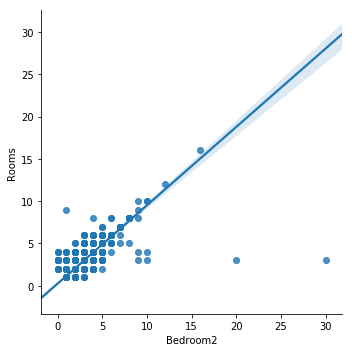

In [11]:
sns.lmplot(data= df_housing, x='Bedroom2', y='Rooms')
plt.show()

Drop `Bedrooms2` as per the above analysis:

In [12]:
# Drop columns
df_housing = df_housing.drop(['Bedroom2','Rooms v Bedroom2'], axis = 1)

__Check 'BuildingArea':__

In [13]:
df_housing['BuildingArea'].loc[df_housing.BuildingArea<1].count()

77

It appears that 77 houses do not have any building area. It may be that some of these values are simply data entry mistakes. The other values from the columns seem ok, but we can choose to delete this sub-sample

In [14]:
#use the unary operator ~ to delete the rows
df_housing = df_housing[~(df_housing['BuildingArea'] < 1)]  
#check the deletion
df_housing['BuildingArea'].loc[df_housing.BuildingArea<1].count()

0

In [15]:
#it is important now to reset the index, otherwise I will have some missing rows in my dataframe, which may be troublesome later.
df_housing = df_housing.reset_index(drop = True) # drop old index

The boxplot shows an outstanding outlier, with a building area of more than 40000 squared meters. 

We can take a closer look to its values.

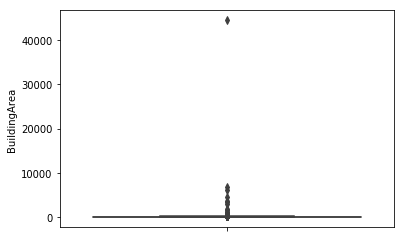

In [16]:
sns.boxplot(data = df_housing, y = 'BuildingArea')
plt.show()

In [17]:
pd.set_option('display.max_columns', 30)

df_housing.loc[df_housing.BuildingArea>40000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22614,New Gisborne,71 Hamilton Rd,5,h,"1,355,000.00",S,Raine,23/09/2017,48.10,"3,438.00",3.00,5.00,"44,500.00","44,515.00",nan,Macedon Ranges Shire Council,-37.45,144.59,Northern Victoria,849.00


Since the building has only 5 rooms, 3 bathrooms and the 'BuildingArea' is bigger than the 'LandSize' it might me an error. However this property could be an old factory with lots of land. 

We'll choose to remove this line as it is far away from the rest, being an extreme outlier:

In [18]:
df_housing.drop(22614 , inplace=True)

In [19]:
df_housing.BuildingArea.describe()

count   13,664.00
mean       157.91
std        133.39
min          1.00
25%        102.00
50%        136.00
75%        188.00
max      6,791.00
Name: BuildingArea, dtype: float64

In [20]:
print('How many NULLs are:', df_housing.BuildingArea.isnull().sum() , 'out of', len(df_housing.BuildingArea) , 'rows! ~60%' )

How many NULLs are: 21115 out of 34779 rows! ~60%


In [21]:
print('No of unique values: ' , len(df_housing.BuildingArea.value_counts()))

No of unique values:  737


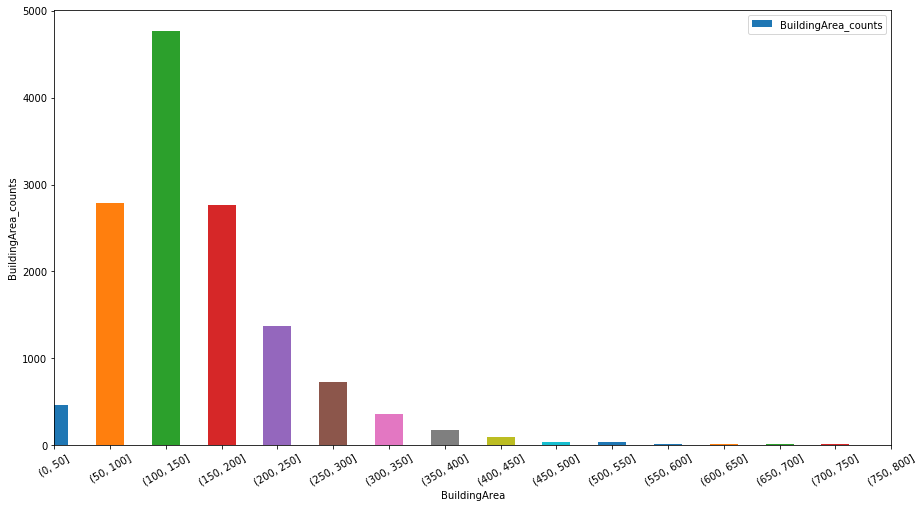

In [22]:
# Group `BuildingArea` in intervals of '50' to see how spread are the houses:
area = df_housing.groupby(pd.cut(df_housing['BuildingArea'], np.arange(0, 1+44600, 50)))['BuildingArea'].count()
area = pd.DataFrame( area )
area.rename(columns={'BuildingArea': 'BuildingArea_counts'}, inplace=True) 

area = area[area.BuildingArea_counts>=1]
area = area.reset_index()

# Plot distribution of intervals:
area.plot.bar( y = 'BuildingArea_counts' , x = 'BuildingArea' , rot=30 , figsize=(15, 8))
plt.ylabel(   'BuildingArea_counts'    )
plt.xlim(0,15)
plt.show()

In [23]:
area['% of Total'] = (area.BuildingArea_counts / area.BuildingArea_counts.sum() * 100)

print('Total:', area[['BuildingArea_counts','% of Total']].sum().values)


Total: [13664.   100.]


In [24]:
area[0:7]

,BuildingArea,BuildingArea_counts,% of Total
0,"(0, 50]",466,3.41
1,"(50, 100]",2785,20.38
2,"(100, 150]",4767,34.89
3,"(150, 200]",2769,20.26
4,"(200, 250]",1369,10.02
5,"(250, 300]",729,5.34
6,"(300, 350]",357,2.61


In [25]:
# Include each value into an interval:
#bins = [1, 50, 100, 150, 200, 250, 300, 500, 50000]
#print(bins)
#cut_ser = pd.cut(df_housing['BuildingArea'], bins=bins)
#cut_ser

# Insert columns with each interval and with a numbered category:
#df_housing['BuildingArea_groups']=pd.cut(df_housing.BuildingArea,bins=bins)
#df_housing['BuildingArea_categories']=(df_housing.BuildingArea_groups!=df_housing.BuildingArea_groups.shift()).cumsum()

#df_housing.drop(['BuildingArea_groups','BuildingArea_categories'] ,axis=1 , inplace=True)

In [26]:
# check YearBuilt > 2018
print(df_housing['YearBuilt'].loc[df_housing.YearBuilt>2018])


#replace 2106 with 2016 and 2019 with 2018
df_housing['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

2453    2,106.00
32960   2,019.00
Name: YearBuilt, dtype: float64


[Go back to top index](#top)


### 2. Data Cleaning<a class="anchor" id="2"></a>



__2.1 Missing values __<a class="anchor" id="21"></a>

It's time to check how many missing data each variable has.


In [27]:
# Count nulls 
null_count = df_housing.isnull().sum()
null_count[null_count>0]

Price             7594
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19303
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [28]:
# Let's have a look at how data is distributed:

pd.options.display.float_format = "{:.1f}".format 

df_housing.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34779.0,27185.0,34778.0,26553.0,26053.0,22989.0,13664.0,15476.0,26803.0,26803.0
mean,3.0,1050118.8,11.2,1.6,1.7,591.7,157.9,1965.2,-37.8,145.0
std,1.0,641425.7,6.8,0.7,1.0,3390.6,133.4,37.3,0.1,0.1
min,1.0,85000.0,0.0,0.0,0.0,0.0,1.0,1196.0,-38.2,144.4
25%,2.0,635000.0,6.4,1.0,1.0,224.0,102.0,1940.0,-37.9,144.9
50%,3.0,870000.0,10.3,2.0,2.0,520.0,136.0,1970.0,-37.8,145.0
75%,4.0,1295000.0,14.0,2.0,2.0,670.0,188.0,2000.0,-37.8,145.1
max,16.0,11200000.0,48.1,12.0,26.0,433014.0,6791.0,2018.0,-37.4,145.5


I want to see how many NULLs the `category` type columns has:

In [29]:
# Display the rows that have at least one `nan` value in the 'object' type columns:
object_nulls = df_housing.select_dtypes(include = ['category'])[df_housing.select_dtypes(include = ['category']).isnull().any(axis=1)]
object_nulls


,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,Propertycount
18521,Footscray,2/16 Stafford St,u,S,Jas,15/07/2017,3011.0,NaN,NaN,nan
26831,Camberwell,2/3 Kingsley St,h,VB,Jellis,11/11/2017,3124.0,NaN,NaN,nan
29418,Fawkner Lot,1/3 Brian St,h,SP,Brad,6/01/2018,nan,NaN,NaN,nan


In [30]:
# Drop rows with NULLs from these 2 columns:
df_housing = df_housing[df_housing.loc[:,df_housing.columns.isin(['CouncilArea','Regionname'])].notnull().all(1)]
df_housing.shape
# df = df[df[['CouncilArea','Regionname']].notnull().all(1) ]

(34776, 20)

### Impute `'Bathroom','Car','Landsize'` with median:

In [31]:
print('Median: \n' ,df_housing.Landsize.median() )

print('\nMode: \n' ,df_housing.Landsize.mode() )

print('\nValue_counts:\n',df_housing.Landsize.value_counts( dropna = False ).head()       )

Median: 
 520.0

Mode: 
 0   0.0
dtype: float64

Value_counts:
 nan      11787
0.0       2437
650.0      203
697.0      123
585.0       97
Name: Landsize, dtype: int64


`Median` is a better value as the mode seems not very good as there are a lot of values with '3' which don't seem real.

In [32]:
cols = df_housing[['Bathroom','Car','Landsize']].columns


df_housing[cols]=df_housing[cols].fillna(df_housing.median().iloc[0])

# Check what is left with NULLs:
df_housing.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bathroom             0
Car                  0
Landsize             0
BuildingArea     21112
YearBuilt        19300
CouncilArea          0
Lattitude         7973
Longtitude        7973
Regionname           0
Propertycount        0
dtype: int64

### Create a new column to use it to impute NULLs:

In [33]:
df_imputed = df_housing.copy()

In [34]:

df_imputed['Sub_Region'] = df_imputed['Suburb'].astype(str)+df_imputed['Regionname'].astype(str)

In [35]:
df_imputed.shape

(34776, 21)

In [36]:
df_imputed['Lattitude'].isnull().sum()

7973

### Impute `'Lattitude','Longtitude'` with median by Regionname and Suburb!

### Impute 'Lattitude'

In [37]:
# Create average for 'Regionname' by 'Lattitude':
build_area_avg_lat = df_imputed.groupby('Regionname')['Lattitude'].mean()
print(build_area_avg_lat)

# Create a df that has the mean per 2 columns:
latt_avg = df_imputed.groupby(['Regionname','Suburb'])['Lattitude'].mean().reset_index()

# Because some 'Suburb' have only NULLs I'll replace them with the average from the 'Regionname':
latt_avg['Lattitude'].fillna(latt_avg['Regionname'].map(build_area_avg_lat) , inplace= True)


# Check if there are any other NULLs left:
latt_avg[latt_avg['Lattitude'].isnull()==True]

# --------------------
# Create a new column from the concatenation of `Suburb` and `Regionname` to be able to join with the original data frame:
# --------------------
latt_avg['Sub_Region'] = latt_avg['Suburb'].astype(str)+latt_avg['Regionname'].astype(str)

# Tranform the data frame to a series with index so I can use it to `map` with the original data frame to replace NULLs
latt_avg_2 = pd.Series(latt_avg['Lattitude'].values, index=latt_avg['Sub_Region'])

Regionname
Eastern Metropolitan         -37.8
Eastern Victoria             -37.9
Northern Metropolitan        -37.7
Northern Victoria            -37.6
South-Eastern Metropolitan   -38.0
Southern Metropolitan        -37.9
Western Metropolitan         -37.8
Western Victoria             -37.7
Name: Lattitude, dtype: float64


### Perform the imputation for `Lattitude`:

In [38]:
df_imputed['Lattitude'].fillna(df_imputed['Sub_Region'].map(latt_avg_2) , inplace= True)

In [39]:
df_imputed['Lattitude'].isnull().sum()

0

### Impute `'Longtitude'`

In [40]:
# Create average for 'Regionname' by 'Longtitude':
build_area_avg_long = df_imputed.groupby('Regionname')['Longtitude'].mean()
print(build_area_avg_long)

# Create a df that has the mean per 2 columns:
long_avg = df_imputed.groupby(['Regionname','Suburb'])['Longtitude'].mean().reset_index()

# Because some 'Suburb' have only NULLs I'll replace them with the average from the 'Regionname':
long_avg['Longtitude'].fillna(long_avg['Regionname'].map(build_area_avg_long) , inplace= True)


# Check if there are any other NULLs left:
long_avg[long_avg['Longtitude'].isnull()==True]

# --------------------
# Create a new column from the concatenation of `Suburb` and `Regionname` to be able to join with the original data frame:
# --------------------
long_avg['Sub_Region'] = long_avg['Suburb'].astype(str)+long_avg['Regionname'].astype(str)

# Tranform the data frame to a series with index so I can use it to `map` with the original data frame to replace NULLs
long_avg_2 = pd.Series(long_avg['Longtitude'].values, index=long_avg['Sub_Region'])

Regionname
Eastern Metropolitan         145.1
Eastern Victoria             145.3
Northern Metropolitan        145.0
Northern Victoria            144.8
South-Eastern Metropolitan   145.2
Southern Metropolitan        145.0
Western Metropolitan         144.8
Western Victoria             144.6
Name: Longtitude, dtype: float64


### Perform the imputation for `Longtitude`:

In [41]:
df_imputed['Longtitude'].fillna(df_imputed['Sub_Region'].map(long_avg_2) , inplace= True)

In [42]:
df_imputed['Longtitude'].isnull().sum()

0

## BuildingArea:
Many of the variables suffer from missing values. 

Building area is the most affected by them. 

I would like to explore it's relationship with price and at the same time evaluate whether it is better to impute the missing values with their mean or median.


In [43]:


# We will save the "test" data columns in variables
# first with the mean
priceWithMean = df_imputed['Price'].fillna(df_imputed['Price'].mean())
BAWithMean = df_imputed['BuildingArea'].fillna(df_imputed['BuildingArea'].mean())

# now with the median
priceMedian = df_imputed['Price'].fillna(df_imputed['Price'].median())
BAMedian = df_imputed['BuildingArea'].fillna(df_imputed['BuildingArea'].median())

NullsEnsemble = df_imputed['Price'].isnull() |  df_imputed['BuildingArea'].isnull()
# NullsEnsemble now has a True for items that are missing a Price or a BuildingArea value

# create a dictionary to indicate different colors, missing values will be orange
colorChoiceDict1 = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}
colorChoiceDict2 = {True: (0.5, 0.1, 0.0, 1.0), False: (0.81, 0.3, 0.72, 0.1)}

# create a column with color values using list comprehension
colorCol1 = [colorChoiceDict1[val] for val in NullsEnsemble]
colorCol2 = [colorChoiceDict2[val] for val in NullsEnsemble]

In [44]:
BAW_mean = df_imputed['BuildingArea'].mean()
print('BAW_mean:%0.2f' %BAW_mean )

BAW_median = df_imputed['BuildingArea'].median()
print('BAW_median:%0.2f' %BAW_median )

Price_mean = df_imputed['Price'].mean()
print('Price_mean:%0.2f' %Price_mean )

Price_median = df_imputed['Price'].median()
print('Price_median:%0.2f' % Price_median )


BAW_mean:157.91
BAW_median:136.00
Price_mean:1050155.53
Price_median:870000.00


(0, 1000)

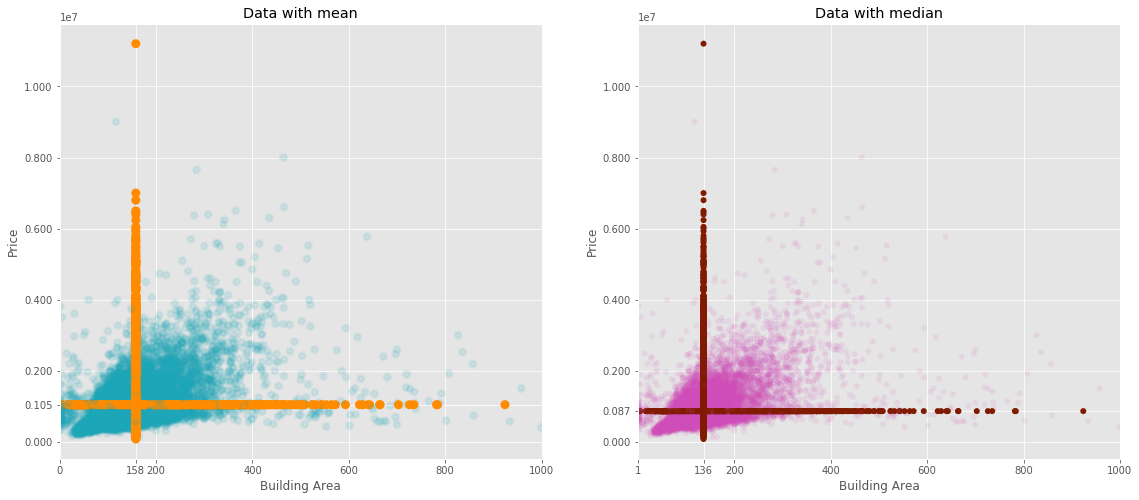

In [45]:
plt.style.use('ggplot')

f,  (ax1,ax2) = plt.subplots(1,2,  sharey=False, figsize=(19, 8))
ax1.scatter(BAWithMean, priceWithMean ,c=colorCol1 , linewidth=3
           )
ax1.xaxis.set_ticks([0,BAW_mean,200,400,600,800,1000])
ax1.yaxis.set_ticks([0,Price_mean,2e6,4e6,6e6,8e6,1e7])

ax1.set_title('Data with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price')
ax1.set_xlim(0,1000)

ax2.scatter(BAMedian, priceMedian ,c=colorCol2 , linewidth=0
           )
ax2.xaxis.set_ticks([1,BAW_median,200,400,600,800,1000])
ax2.yaxis.set_ticks([0,Price_median,2e6,4e6,6e6,8e6,1e7])

ax2.set_title('Data with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price')
ax2.set_xlim(0,1000)


No visible difference and I'll choose to impute NULLs in BuildingArea with median corresponding to ['Regionname' and 'Suburb']

### Impute NULLs in `BuildingArea` with median from ['Regionname' and 'Suburb']
If there are Suburb with missing value, I'll impute with median from 'Regionname'

Create a pandas Series with median for 'Regionname'.

I'll use the Series in a `map` transformation later:

In [46]:
# Create average for 'Regionname':
build_area_avg = df_imputed.groupby('Regionname')['BuildingArea'].median()
build_area_avg

Regionname
Eastern Metropolitan         157.0
Eastern Victoria             159.5
Northern Metropolitan        120.0
Northern Victoria            151.0
South-Eastern Metropolitan   147.0
Southern Metropolitan        146.0
Western Metropolitan         136.0
Western Victoria             122.9
Name: BuildingArea, dtype: float64

In [47]:
# Create a df that has the mean per 2 columns:
suburb_avg2 = df_imputed.groupby(['Regionname','Suburb'])['BuildingArea'].median().reset_index()

# Because some 'Suburb' have only NULLs I'll replace them with the average from the 'Regionname':
suburb_avg2['BuildingArea'].fillna(suburb_avg2['Regionname'].map(build_area_avg) , inplace= True)

# Check if there are any other NULLs left:
suburb_avg2[suburb_avg2['BuildingArea'].isnull()==True]

,Regionname,Suburb,BuildingArea


Create a new column from the concatenation of `Suburb` and `Regionname` to be able to join with the original data frame:

In [48]:
suburb_avg2['Sub_Region'] = suburb_avg2['Suburb'].astype(str)+suburb_avg2['Regionname'].astype(str)
suburb_avg2.head()

,Regionname,Suburb,BuildingArea,Sub_Region
0,Eastern Metropolitan,Bayswater,140.0,BayswaterEastern Metropolitan
1,Eastern Metropolitan,Bayswater North,132.0,Bayswater NorthEastern Metropolitan
2,Eastern Metropolitan,Bellfield,102.0,BellfieldEastern Metropolitan
3,Eastern Metropolitan,Blackburn,166.0,BlackburnEastern Metropolitan
4,Eastern Metropolitan,Blackburn North,155.4,Blackburn NorthEastern Metropolitan


In [49]:
# Tranform the data frame to a series with index so I can use it to `map` with the original data frame to replace NULLs
suburb_avg2_2 = pd.Series(suburb_avg2['BuildingArea'].values, index=suburb_avg2['Sub_Region'])
suburb_avg2_2.head()

Sub_Region
BayswaterEastern Metropolitan         140.0
Bayswater NorthEastern Metropolitan   132.0
BellfieldEastern Metropolitan         102.0
BlackburnEastern Metropolitan         166.0
Blackburn NorthEastern Metropolitan   155.4
dtype: float64

__Perform the imputation for `BuildingArea`:__

In [50]:
df_imputed['BuildingArea'].fillna(df_imputed['Sub_Region'].map(suburb_avg2_2) , inplace= True)

### Impute 'YearBuilt' with mode per Regionname:

In [51]:
df_imputed['YearBuilt'][df_imputed['Suburb'] == 'Williamstown'].mode()

0   1900.0
dtype: float64

In [52]:
from scipy import stats
build_area_mode = df_imputed.groupby('Regionname')['YearBuilt'].agg(lambda x: stats.mode(x)[0][0])
build_area_mode

Regionname
Eastern Metropolitan         1970.0
Eastern Victoria             1980.0
Northern Metropolitan        1970.0
Northern Victoria            1980.0
South-Eastern Metropolitan   1970.0
Southern Metropolitan        1970.0
Western Metropolitan         1970.0
Western Victoria             1975.0
Name: YearBuilt, dtype: float64

In [53]:
# Create a df that has the MODE per 2 columns:

from scipy import stats
suburb_mode = df_imputed.groupby(['Regionname','Suburb'])['YearBuilt'].agg(lambda x: stats.mode(x)[0][0]).reset_index()


In [54]:
# Replace '0' with 'nan' so I'll be able to replace those with the 'mode' later.
suburb_mode['YearBuilt'] = suburb_mode['YearBuilt'].replace(0, np.nan)

# Because some 'Suburb' have only NULLs I'll replace them with the mode from the 'Regionname':
suburb_mode['YearBuilt'].fillna(suburb_mode['Regionname'].map(build_area_mode) , inplace= True)


Create a new column from the concatenation of `Suburb` and `Regionname` to be able to join with the original data frame:

In [55]:
suburb_mode['Sub_Region'] = suburb_mode['Suburb'].astype(str)+suburb_mode['Regionname'].astype(str)

# Tranform the data frame to a series with index so I can use it to `map` with the original data frame to replace NULLs
suburb_mode_2 = pd.Series(suburb_mode['YearBuilt'].values, index=suburb_mode['Sub_Region'])


# Perform the imputation for BuildingArea:
df_imputed['YearBuilt'].fillna(df_imputed['Sub_Region'].map(suburb_mode_2) , inplace= True)
df_imputed.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7594
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Sub_Region          0
dtype: int64

### Remove lines where PRICE value is `nan`

In [56]:
# How many rows are with `nan`:
c = df_imputed.Price.isnull().sum()
c[c>0]

array([7594], dtype=int64)

In [57]:
#Drop only if NaN in specific column
# Create new dataframe where Price <> NAN:

df_price_nonnull = df_imputed.dropna(subset=['Price']).copy()
df_price_nonnull.reset_index(drop = True , inplace = True)

In [58]:
df_price_nonnull.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Sub_Region       0
dtype: int64

### 2.2 Outliers <a class="anchor" id="23"></a>

In [59]:
# create additional columns filled with 0 values
df_price_nonnull["isOutlierPrice"] = 0 
df_price_nonnull["isOutlierDistance"] = 0

# save the mean and standard deviation in variables
meanPrice = df_price_nonnull['Price'].mean()
stdDevPrice = df_price_nonnull['Price'].std()

meanDistance = df_price_nonnull['Distance'].mean()
stdDevDistance = df_price_nonnull['Distance'].std()

#mark outliers as 
df_price_nonnull['isOutlierPrice'] = np.where(abs(df_price_nonnull['Price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
df_price_nonnull['isOutlierDistance'] = np.where(abs(df_price_nonnull['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [60]:
#create a function to compute the percentage of missing values
def percent(nom, denom):
    res= (nom*100)/denom
    print("%.3f%%" % round(res,3))

#percentage for Price
print('percentage for Price:')
percent(df_price_nonnull["isOutlierPrice"].value_counts()[1], df_price_nonnull["isOutlierPrice"].value_counts()[0]) 

percentage for Price:
0.414%


In [61]:
print('percentage for Distance:')
percent(df_price_nonnull["isOutlierDistance"].value_counts()[1], df_price_nonnull["isOutlierDistance"].value_counts()[0])

percentage for Distance:
0.203%




With this high threshold, less than 1% of values are considered outliers. The next graph visualize this proportion.


In [62]:


# This part helps us to generate a color array with different colors for the 1D outliers we compute

# first create an empty list
colorColumn = []
# we make use of the HEX color codes to use nicely distinguisable colors
for i in range(len(df_price_nonnull)):
    if df_price_nonnull["isOutlierPrice"][i]== 1:
        colorColumn.append("#ed0dd9") # fuchsia color
    elif df_price_nonnull["isOutlierDistance"][i] == 1:
        colorColumn.append("#fd3c06") # orange color
    else:
        colorColumn.append("b") # gray




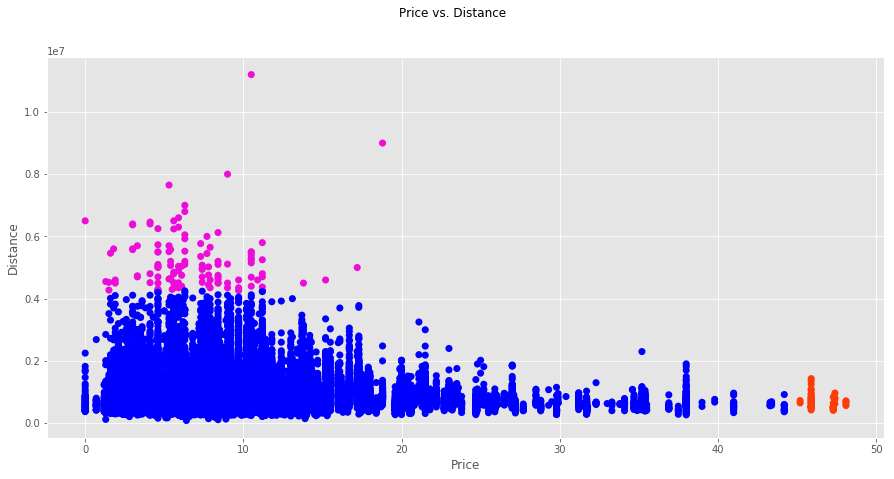

In [63]:
plt.figure(figsize=(15,7))
plt.xlabel('Price')
plt.suptitle('Price vs. Distance')
plt.ylabel('Distance')
plt.scatter(df_price_nonnull.Distance, df_price_nonnull.Price , c = colorColumn, s = 50 , linewidth=0
           )
plt.show()

The revious visualization was a simple 1D outlier measure: each point was either an outlier either for price or distance. 

But what about those points that are 2D outliers, that is on the edge of the distribution for both variables? 

In order to detect those points we need high-dimensional methods. Mahalanobis distance is one such measure, which will help to realize our next graph.

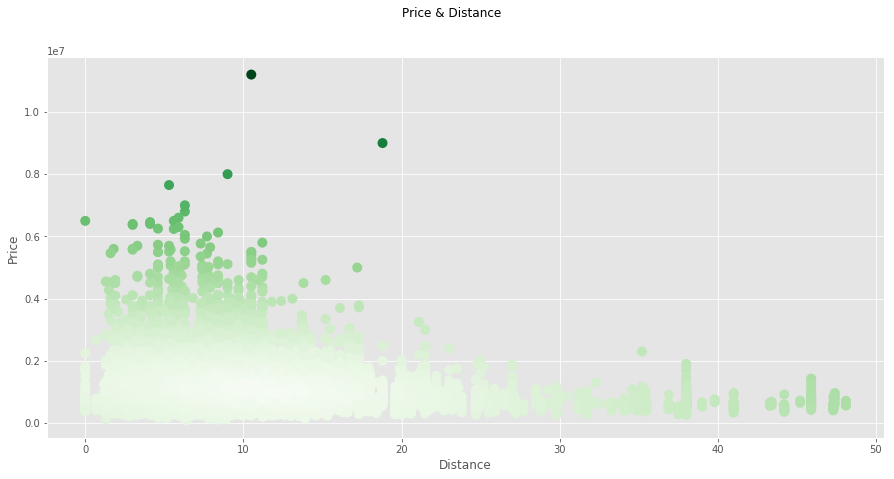

In [64]:
# We now get a part of the data frame as a numpy matrix to use in scipy
# housing.dropna()
columnValues = df_price_nonnull.as_matrix(["Price", "Distance"])

# In order to generate a "mean vector", we use the mean values already computed above.
# Notice that we make use of the reshape() function to get the mean vector in a compatible shape
# as the data values.
meanVector = np.asarray([meanPrice, meanDistance]).reshape(1,2)

# We make us of the scipy function which does the computations itself.
# Alternatively, one can provide a covariance matrix that is computed outside as a parameter.
# In cases where robustness of the covariance matrix is the issue, this can be a good option.

# first import the spatial subpackage from scipy
from scipy import spatial
mahalanobisDistances = spatial.distance.cdist(columnValues, meanVector, 'mahalanobis')[:,0]

# We create a new figure where we use a color mapping and use the computed mahalanobis distances 
# as the mapping value
plt.figure(figsize=(15,7))
plt.xlabel('Distance')
plt.suptitle('Price & Distance')
plt.ylabel('Price')
plt.scatter(df_price_nonnull.Distance
            , df_price_nonnull.Price 
            , c = mahalanobisDistances
            , cmap = plt.cm.Greens
            , s = 100
            , linewidth=0
           )

[Go back to top index](#top)

### 2.3 Feature engineering<a class="anchor" id="23"></a>

* create variable number of years since building

In [65]:
df_price_nonnull['houseAge'] = 2018-df_price_nonnull['YearBuilt']

* Then create two new categories from the variable Date: year and season

In [66]:
#create the new column data restructuring the original Date column with pd.to_datetime
df_price_nonnull['date_time'] = pd.to_datetime(df_price_nonnull['Date'])

In [67]:
# calculate day of year
df_price_nonnull['doy'] = df_price_nonnull['date_time'].dt.dayofyear
# Create year
df_price_nonnull['Year'] = df_price_nonnull['date_time'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in df_price_nonnull['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
df_price_nonnull['season']= pd.Series(daje)

In [68]:
df_price_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 28 columns):
Suburb               27182 non-null category
Address              27182 non-null category
Rooms                27182 non-null int64
Type                 27182 non-null category
Price                27182 non-null float64
Method               27182 non-null category
SellerG              27182 non-null category
Date                 27182 non-null category
Distance             27182 non-null float64
Postcode             27182 non-null category
Bathroom             27182 non-null float64
Car                  27182 non-null float64
Landsize             27182 non-null float64
BuildingArea         27182 non-null float64
YearBuilt            27182 non-null float64
CouncilArea          27182 non-null category
Lattitude            27182 non-null float64
Longtitude           27182 non-null float64
Regionname           27182 non-null category
Propertycount        27182 non-null category
Sub

[Go back to top index](#top)

### 3. Visualisations<a class="anchor" id="3"></a>

<b>3.1 Boxplots and histograms</b> <a class="anchor" id="31"></a>

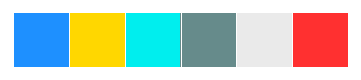

In [329]:
#create my color palette
myPal = ["#1E90FF", "#FFD700", "#00EEEE", "#668B8B", "#EAEAEA", "#FF3030"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

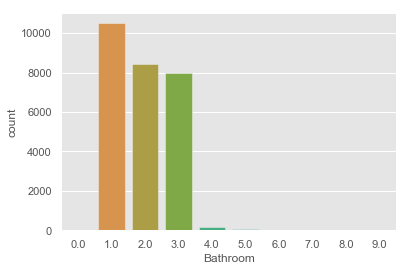

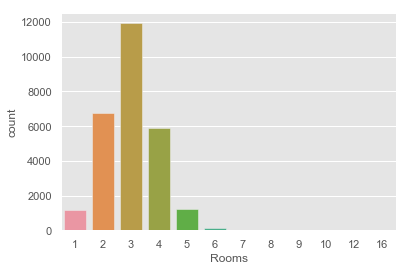

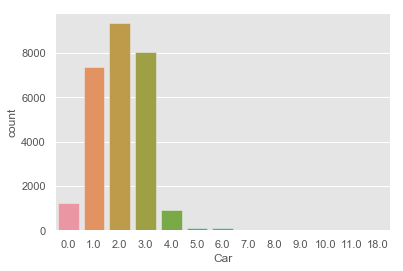

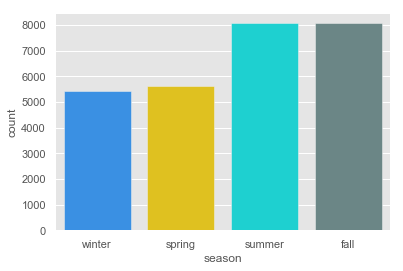

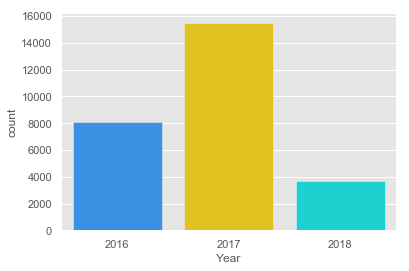

In [330]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=df_price_nonnull)



__Insights:__

* most properties were sold on 2017;
* More properties are sold during summer and fall;
* most houses have space for 2 cars, but those with 1&3 are pretty close;
* most of the houses have 3 rooms, followed closely by 2&4
* most of the houses have 2&3 bathrooms;





Now I'll take a look at the distribution of continous variables using histograms


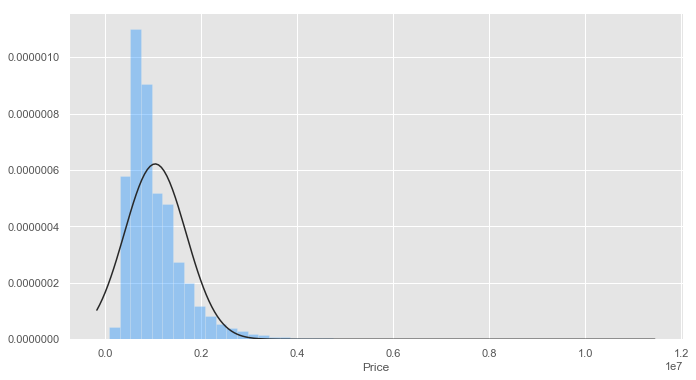

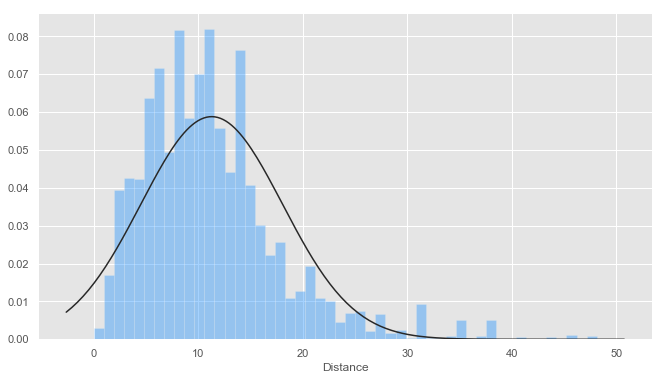

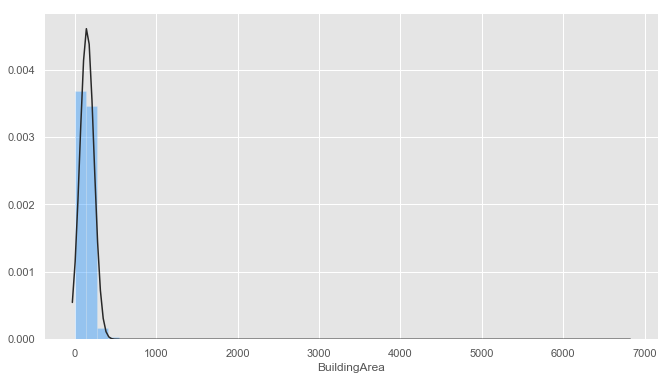

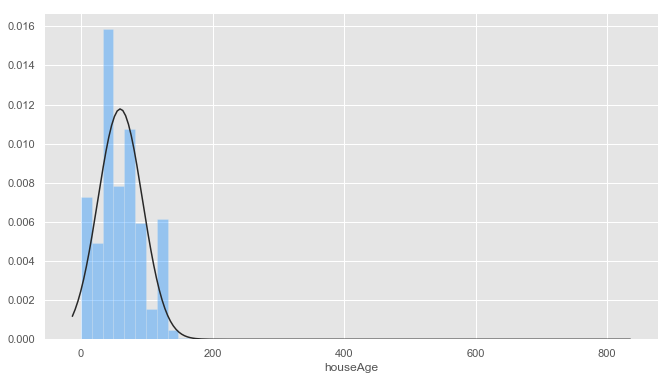

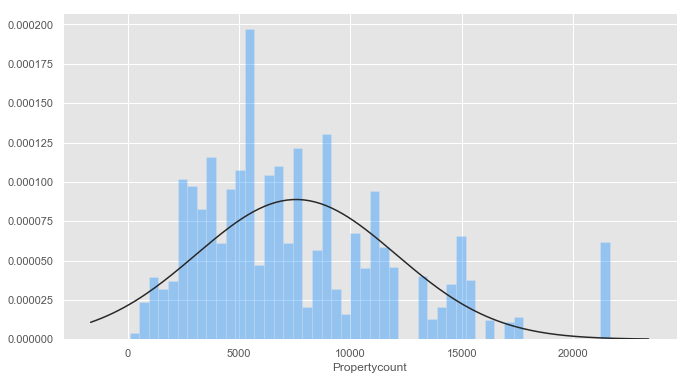

In [331]:
l= [df_price_nonnull['Price'], df_price_nonnull['Distance'], df_price_nonnull['BuildingArea'], df_price_nonnull['houseAge'], df_price_nonnull['Propertycount']]
for i in l:
    plt.figure(figsize=(11,6))
    sns.distplot(i, fit=norm, kde=False)

Let's analyze closer `BuildingArea`

(0, 1000)

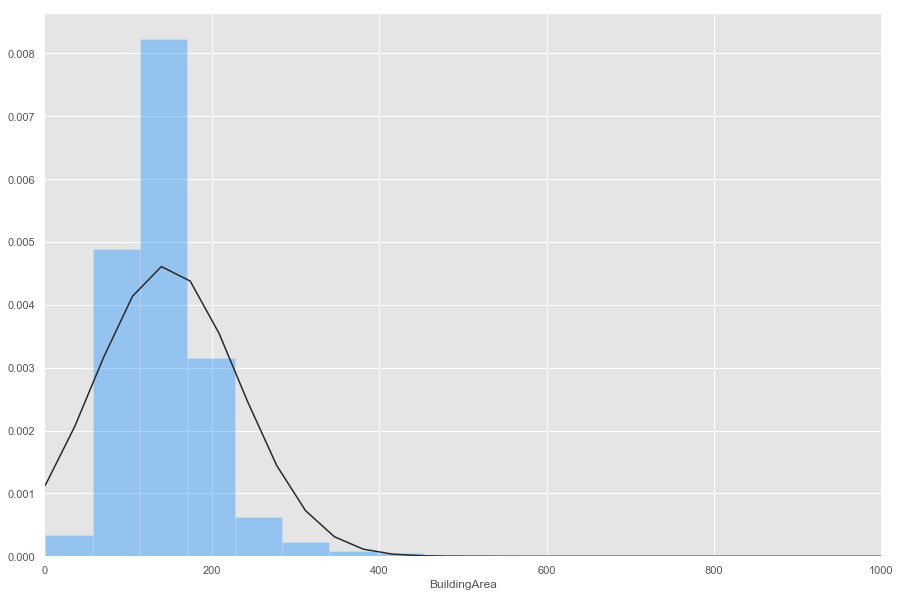

In [332]:
plt.figure(figsize=(15,10))
sns.distplot(df_price_nonnull['BuildingArea'], fit=norm, bins=120, kde=False)
plt.xlim(0,1000)



Biggest insight here is that all variables have a different scale, there are many outliers for most of them and no one seem really close to normality. 

These observations will come useful later when I will scale my features.


> Let us check some variables that may influence our dependent variable price.

Text(0.5,1,'Rooms & Price')

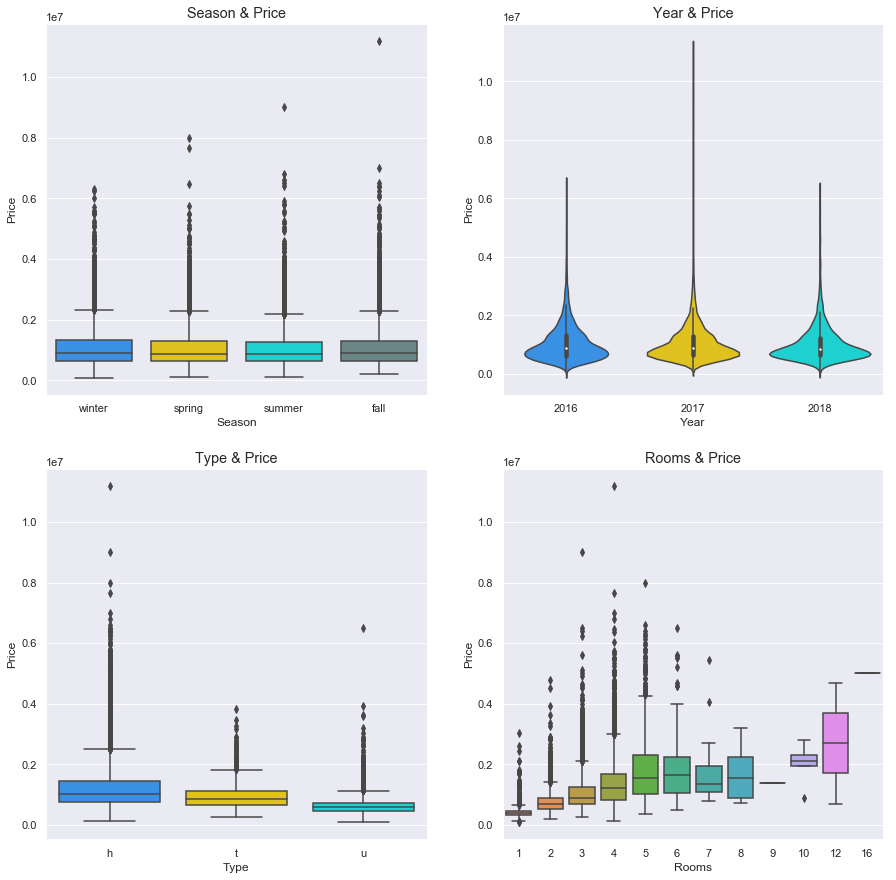

In [333]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = df_price_nonnull, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = df_price_nonnull, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = df_price_nonnull, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = df_price_nonnull, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')



* Regarding season, there is no big diffence in price between houses sold on different parts of the year;
* As for years, 2017 was the best year for the market, with apparently more high price outliers. 2018 has less activity, perhaps because data collection did not include the whole year.
* It seems that there is a slight linear increase in Price for more rooms. Note that not all the levels of variable rooms are very stable, with 9 and 16 showing very little variability (they surely have few cases).
* Type of house may be an important indicator for price, as is seems that h (cottages) cost more, and have more variability in price.



In [69]:
df_numeric = df_price_nonnull.select_dtypes(include = ['int64','float64','datetime64[ns]'])


In [70]:
df_numeric = df_price_nonnull[['Rooms','Price','Distance','Bathroom','Car','Landsize' , 'BuildingArea','Propertycount']].copy()


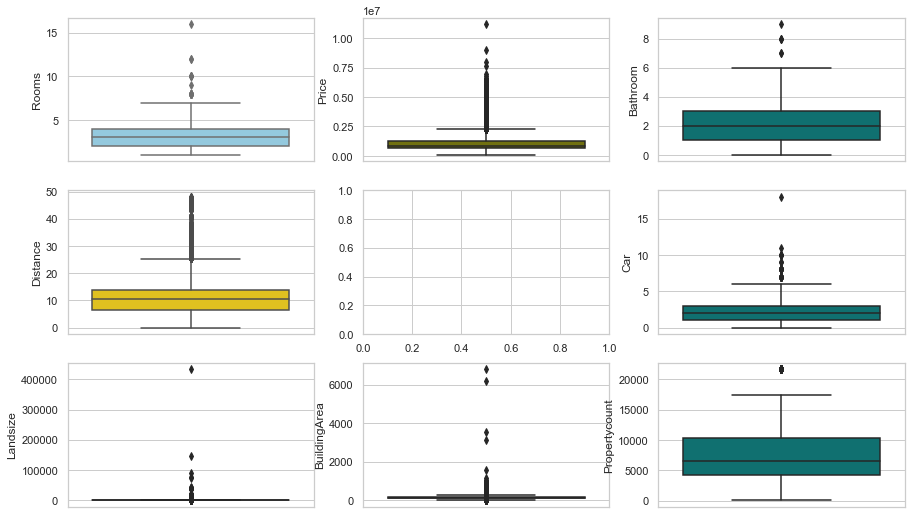

In [71]:
sns.set(style="whitegrid" )
# plot
f, axes = plt.subplots(3, 3, figsize=(15, 9), sharex=False )
sns.boxplot( df_numeric["Rooms"] , color="skyblue", ax=axes[0, 0], orient = 'v')
sns.boxplot( df_numeric["Price"] , color="olive", ax=axes[0, 1]  , orient = 'v')
sns.boxplot( df_numeric["Distance"] , color="gold", ax=axes[1, 0], orient = 'v')

sns.boxplot( df_numeric["Bathroom"] , color="teal", ax=axes[0, 2], orient = 'v')
sns.boxplot( df_numeric["Car"] , color="teal", ax=axes[1, 2], orient = 'v')
sns.boxplot( df_numeric["Landsize"] , color="teal", ax=axes[2, 0], orient = 'v')
sns.boxplot( df_numeric["BuildingArea"] , color="teal", ax=axes[2, 1], orient = 'v')
sns.boxplot( df_numeric["Propertycount"] , color="teal", ax=axes[2, 2], orient = 'v')
plt.show()

We could also remove the outliers that are 3-5 standard deviation.

[Go back to top index](#top)

### 3.2. Time series <a class="anchor" id="32"></a>

Considering the size of the dataset I expected to have house sales for almost every day. 

Unexpectedly, out of all the 2 and a half years, houses were sold only during 78 days (see below the shape computation).

In [72]:
#use shape to count the number of rows of the database grouped by day using a pivot table.
df_price_nonnull.pivot_table('Price', index='date_time', aggfunc='count')#.shape

,Price
date_time,
2016-01-28,2
2016-03-09,270
2016-03-12,360
2016-04-02,35
2016-04-06,284
2016-04-16,266
2016-04-23,135
2016-05-14,250
2016-05-22,267


In [73]:
#create index month-year
df_price_nonnull['month_year'] = df_price_nonnull['date_time'].dt.to_period('M')

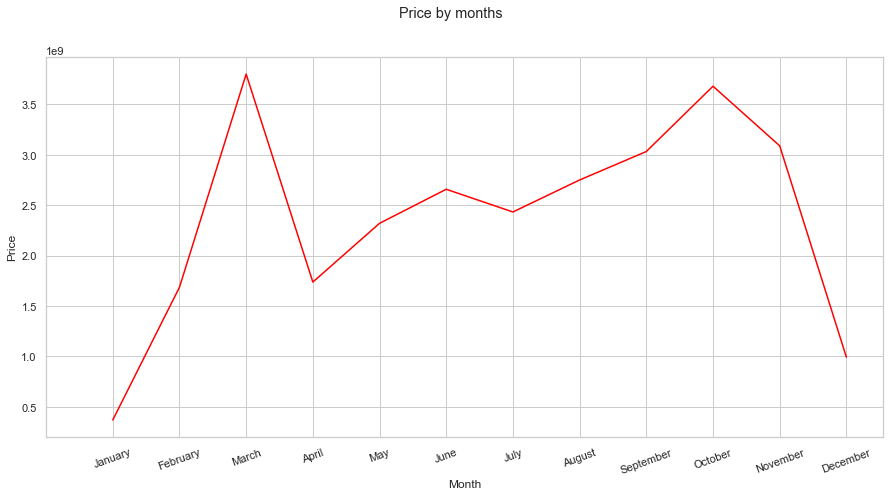

In [74]:


import calendar
# create new column storing the month of each operation
df_price_nonnull['month'] = df_price_nonnull['date_time'].dt.month
#use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= df_price_nonnull.groupby('month')['Price'].sum()
#plot figure
plt.figure(figsize=(15,7))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price by months')
plt.ylabel('Price')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

plt.show()

[Text(0,0,'2016-01'),
 Text(0,0,'2016-03'),
 Text(0,0,'2016-04'),
 Text(0,0,'2016-05'),
 Text(0,0,'2016-06'),
 Text(0,0,'2016-07'),
 Text(0,0,'2016-08'),
 Text(0,0,'2016-09'),
 Text(0,0,'2016-10'),
 Text(0,0,'2016-11'),
 Text(0,0,'2016-12'),
 Text(0,0,'2017-01'),
 Text(0,0,'2017-02'),
 Text(0,0,'2017-03'),
 Text(0,0,'2017-04'),
 Text(0,0,'2017-05'),
 Text(0,0,'2017-06'),
 Text(0,0,'2017-07'),
 Text(0,0,'2017-08'),
 Text(0,0,'2017-09'),
 Text(0,0,'2017-10'),
 Text(0,0,'2017-11'),
 Text(0,0,'2017-12'),
 Text(0,0,'2018-01'),
 Text(0,0,'2018-02'),
 Text(0,0,'2018-03'),
 Text(0,0,'2018-06'),
 Text(0,0,'2018-10')]

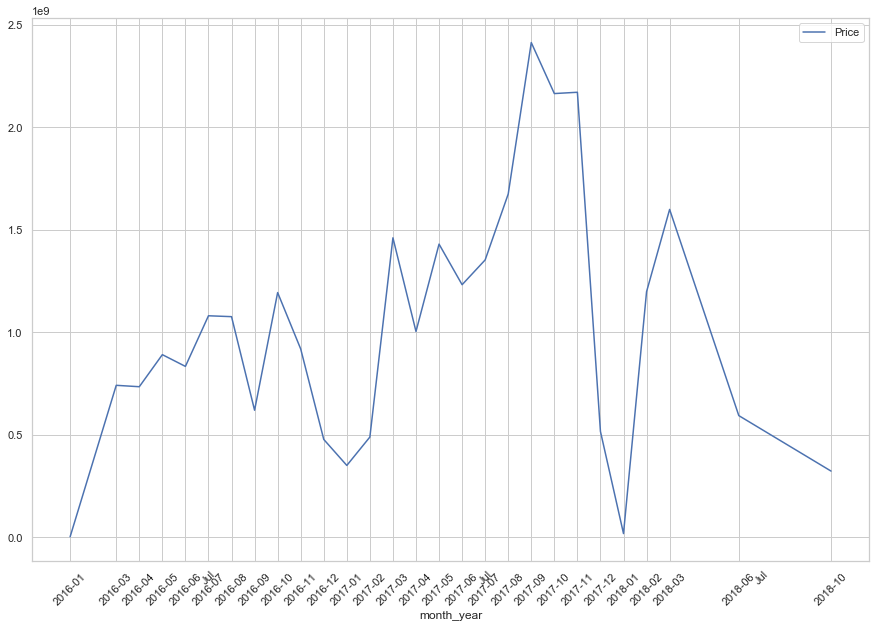

In [75]:
#create index month-year
df_price_nonnull['month_year'] = df_price_nonnull['date_time'].dt.to_period('M')
#use groupby to compute the price for each available month, then store the result in a dataframe
by_year_month= pd.Series.to_frame(df_price_nonnull.groupby('month_year')['Price'].sum())
#draw graph
fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)


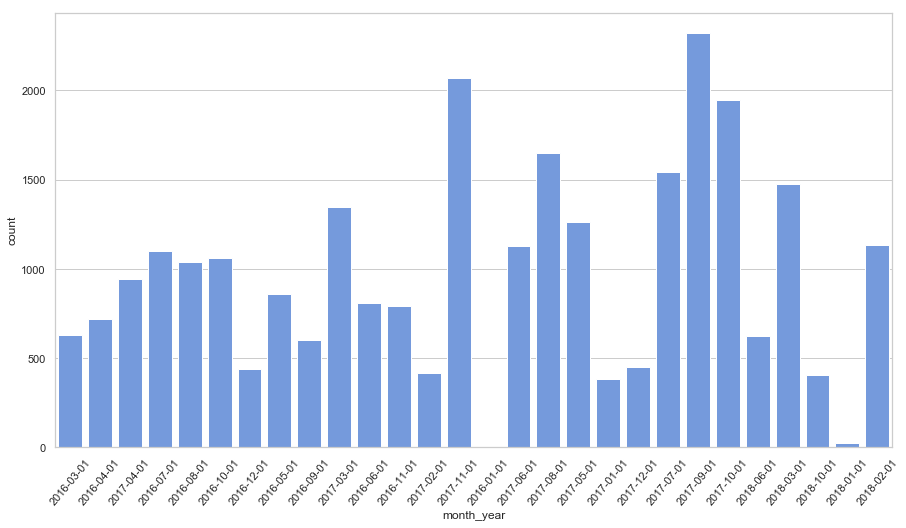

In [76]:
plt.figure(figsize=(15,8))
p = sns.countplot(df_price_nonnull['month_year'], color='cornflowerblue')
#plt.xticks(rotation=45)

# get current axis
ax = plt.gca()
## get current xtick labels
xticks = [item.get_text() for item in list(p.get_xticklabels())]
## convert all xtick labels to selected format from ms timestamp
ax.set_xticklabels([pd.to_datetime(tm, unit = 'ns').strftime('%Y-%m-%d') for tm in xticks]     ,rotation=50)
plt.show()

[Go back to top index](#top)

### 3.3. Correlation matrix and scatterplots<a class="anchor" id="33"></a>

 Let us look at the correlations between our variables, first with a correlation matrix.

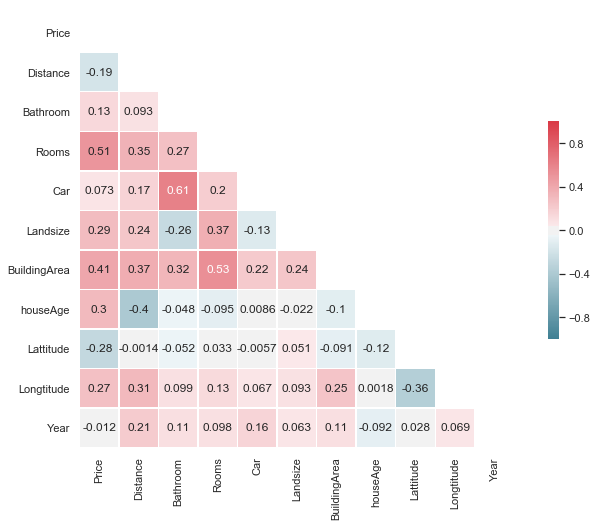

In [77]:


#select only the data we are interested in
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
h= df_price_nonnull[attributes]

#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=h.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(12,8))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()



I will now examine the relationship between Price and four other variables:

* BuildingArea (r= .4)
* HouseAge (r= .3)
* Rooms - This is the strongest relationship (.51).
* Distance - negative correlation (-.28)



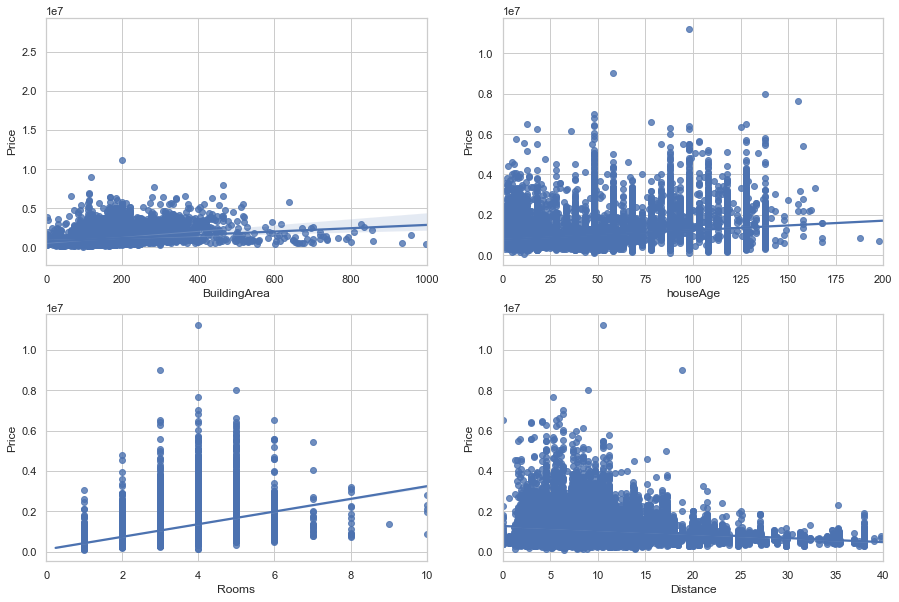

In [343]:
# Scatterplot
f, axes = plt.subplots(figsize = (15,10))
plt.subplot(221)
g1=sns.regplot(data= df_price_nonnull, x='BuildingArea', y='Price')
g1.set(xlim=(0, 1000)  )
#g1.set()
plt.subplot(222)

g2=sns.regplot(data= df_price_nonnull, x='houseAge', y='Price')
g2.set(xlim=(0, 200))
plt.subplot(223)

g3=sns.regplot(data= df_price_nonnull, x='Rooms', y='Price')
g3.set(xlim=(0, 10))
plt.subplot(224)

g4 = sns.regplot(data= df_price_nonnull, x='Distance', y='Price')
g4.set(xlim=(0, 40))

plt.show()

### Let's see how is price related to distance from city center for a regular house?

In [78]:
df_price_nonnull.Type.value_counts()

h    18420
u     5901
t     2861
Name: Type, dtype: int64

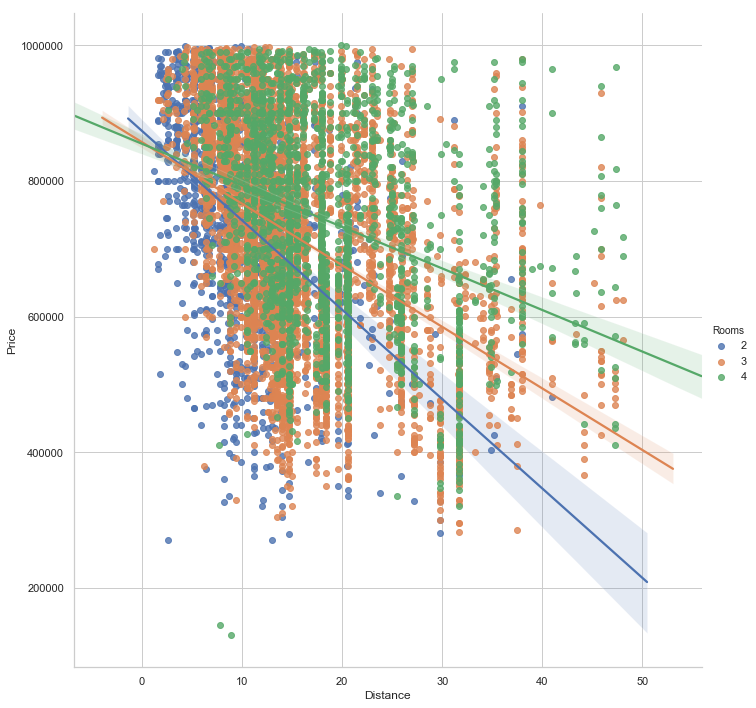

In [345]:
#plt.figure(figsize=(10,5))

sns.lmplot("Distance","Price"
           ,df_price_nonnull[(df_price_nonnull["Rooms"]<=4) & 
                (df_price_nonnull["Rooms"]>= 2) & 
                (df_price_nonnull["Type"]=="h") &
                (df_price_nonnull["Price"]< 1000000)
                 ].dropna()
           ,hue="Rooms"
           ,height=10)
plt.show()

The further the distance to the city center the cheaper the price is.

However for a house with 2 rooms the drop in price is steeper than for 3 and more for 4.

### `Type` of the house:
Is the type of house influencing the relationship of the variables we examined? 

For example, when a townhouse gets old I think that it loses value, as we tend to prize more modern venues in western cities. But what about an historical villa deep into the countryside? In that case I think that the price may well increase as the property ages, like a vintage item.


Type: 
* br - bedroom(s); 
* h - house,cottage,villa, semi,terrace; 
* u - unit, duplex; 
* t - townhouse; 
* dev site - development site; 
* o res - other residential.

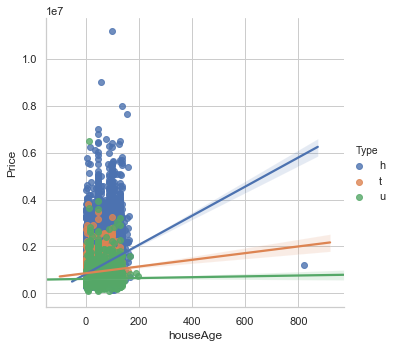

In [346]:
sns.lmplot(data= df_price_nonnull, x='houseAge', y= 'Price', hue= 'Type')
plt.show()



Indeed, it seems that there is an interaction between type of house and its age to determine the price: as the house gets older, the price increases on average, but this is particularly true for Type h, that is cottages and villas.

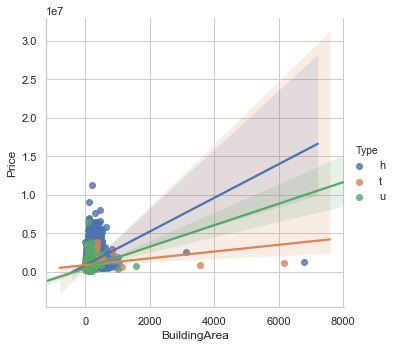

In [347]:
sns.lmplot(data= df_price_nonnull, x='BuildingArea', y= 'Price', hue='Type')

plt.show()

[Go back to top index](#top)


### 3.4. Geographical Data<a class="anchor" id="33"></a>

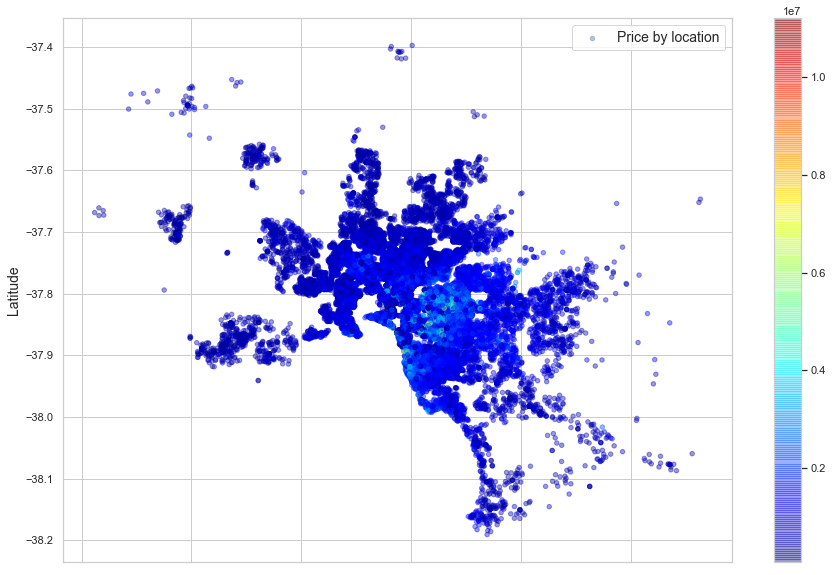

In [348]:
df_price_nonnull.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=df_price_nonnull.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

Perhaps I should remove outliers from price and try to replot the graph.

Or I should try to normalize the data first. ???

In [79]:
df_price_nonnull['Price_NoOutliers']= df_price_nonnull['Price'].loc[df_price_nonnull.Price<3500000]

Text(0.5,1,'Without Outliers')

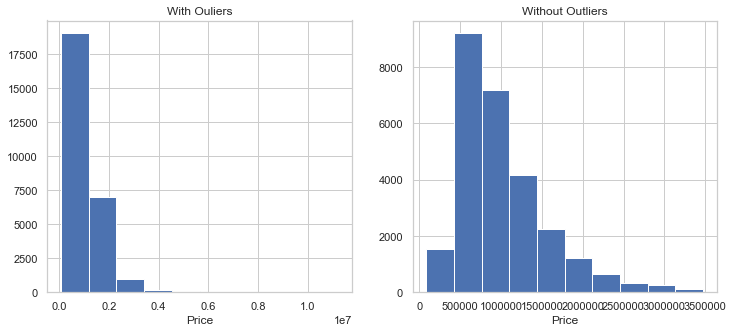

In [80]:
f, axes = plt.subplots(1,2, figsize = (12,5))
# Plot [0,0] full price
df_price_nonnull['Price'].hist(ax = axes[0])
axes[0].set_title('With Ouliers')
axes[0].set_xlabel('Price')

# Plot [0,1] price cut
df_price_nonnull['Price_NoOutliers'].hist(ax = axes[1] )
axes[1].set_xlabel('Price')
axes[1].set_title('Without Outliers')

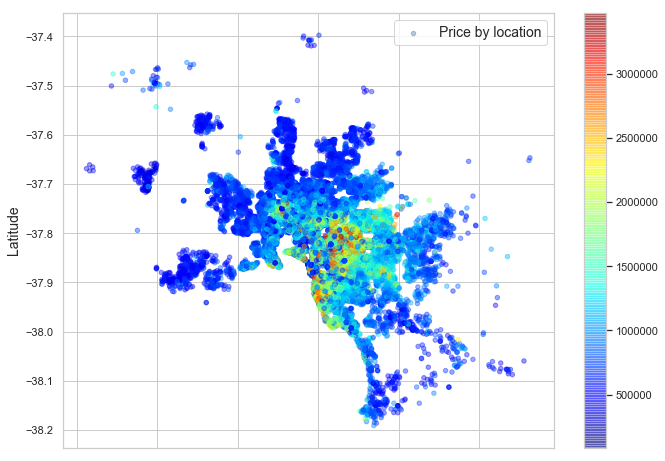

In [351]:
df_price_nonnull.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=df_price_nonnull.Price_NoOutliers, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(11,8)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

![title](melbourne_map.png)

In [81]:
df_price_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 31 columns):
Suburb               27182 non-null category
Address              27182 non-null category
Rooms                27182 non-null int64
Type                 27182 non-null category
Price                27182 non-null float64
Method               27182 non-null category
SellerG              27182 non-null category
Date                 27182 non-null category
Distance             27182 non-null float64
Postcode             27182 non-null category
Bathroom             27182 non-null float64
Car                  27182 non-null float64
Landsize             27182 non-null float64
BuildingArea         27182 non-null float64
YearBuilt            27182 non-null float64
CouncilArea          27182 non-null category
Lattitude            27182 non-null float64
Longtitude           27182 non-null float64
Regionname           27182 non-null category
Propertycount        27182 non-null category
Sub

__Analyze the rows with ZEROs__

There are not so many and we can think the data was filled in ok.

In [82]:

zero_count_columns = ( df_price_nonnull.select_dtypes(exclude = ['category'])==0 ).sum(axis=0) 
#zero_count_columns = ( df == 0 ).sum(axis=0)

In [83]:
zero_count_columns

Rooms                    0
Price                    0
Distance                58
Bathroom                34
Car                   1251
Landsize              1942
BuildingArea             0
YearBuilt                0
Lattitude                0
Longtitude               0
Sub_Region               0
isOutlierPrice       27070
isOutlierDistance    27127
houseAge                 5
date_time                0
doy                      0
Year                     0
season                   0
month_year               0
month                    0
Price_NoOutliers         0
dtype: int64

In [84]:
df_price_nonnull.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 31 columns):
Suburb               27182 non-null category
Address              27182 non-null category
Rooms                27182 non-null int64
Type                 27182 non-null category
Price                27182 non-null float64
Method               27182 non-null category
SellerG              27182 non-null category
Date                 27182 non-null category
Distance             27182 non-null float64
Postcode             27182 non-null category
Bathroom             27182 non-null float64
Car                  27182 non-null float64
Landsize             27182 non-null float64
BuildingArea         27182 non-null float64
YearBuilt            27182 non-null float64
CouncilArea          27182 non-null category
Lattitude            27182 non-null float64
Longtitude           27182 non-null float64
Regionname           27182 non-null category
Propertycount        27182 non-null category
Sub

__Drop some columns that I won't be needing:__

In [85]:
df_price_nonnull.select_dtypes(include = ['int32','int64','float64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'isOutlierPrice', 'isOutlierDistance', 'houseAge', 'doy', 'Year',
       'month', 'Price_NoOutliers'],
      dtype='object')

In [86]:
df_price_nonnull.drop(['doy', 'Year', 'month','Price_NoOutliers','isOutlierPrice', 'isOutlierDistance']
                      , axis = 1 , inplace=True 
                     )

## Standardize numerical columns

In [87]:
# Standardize the numerical columns. 
from sklearn import preprocessing

# Create list of columns of object type
numeric_columns = df_price_nonnull.select_dtypes(include = ['int64','float64']).columns
# Convert to List:
numeric_columns = list(numeric_columns)
# Drop Price from columns' data frame:
numeric_columns.remove('Price')



pd.options.display.float_format = "{:.2f}".format 

# standardize the data attributes using `scale` method:
# v1:pd.DataFrame(preprocessing.scale(raw_data4_iqr ) , columns=names ) #the `scale` already includes fit_transform

# v2:
#scaler = preprocessing.StandardScaler()
scaler = preprocessing.StandardScaler()

df_price_nonnull_std = pd.DataFrame(scaler.fit_transform(df_price_nonnull[numeric_columns]), columns=numeric_columns )
df_price_nonnull_std#.head(10)

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,houseAge
0,-1.04,-1.29,-1.08,-1.01,-0.06,-0.55,-1.73,0.09,0.01,1.73
1,-1.04,-1.29,-1.08,-1.99,-0.08,-0.77,-1.73,-0.00,-0.04,1.73
2,0.01,-1.29,0.09,-1.99,-0.08,0.05,-1.73,-0.02,-0.03,1.73
3,0.01,-1.29,0.09,-1.01,-0.10,-0.55,-1.73,0.12,-0.01,1.73
4,1.06,-1.29,-1.08,-0.04,-0.09,-0.04,1.64,0.01,-0.03,-1.64
5,-1.04,-1.29,-1.08,-1.99,-0.07,-0.55,-1.73,0.04,-0.02,1.73
6,0.01,-1.29,0.09,-1.99,-0.05,0.74,-1.43,0.06,0.01,1.43
7,-1.04,-1.29,-1.08,-0.04,-0.04,-0.45,-2.02,0.02,-0.02,2.02
8,0.01,-1.29,1.25,0.94,-0.13,-0.55,-1.73,0.04,-0.00,1.73
9,-1.04,-1.29,1.25,0.94,-0.13,-0.55,-1.73,0.04,-0.00,1.73


In [88]:
# Make the initial index a column b/c StandardScale rewrites the index and I won't be able to join with the other columns!
df_price_nonnull = df_price_nonnull.reset_index(drop=False)
df_price_nonnull

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sub_Region,houseAge,date_time,season,month_year
0,0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,1.00,1.00,202.00,98.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2016-03-12,winter,2016-03
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,1.00,0.00,156.00,79.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2016-04-02,spring,2016-04
2,2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,2.00,0.00,134.00,150.00,1900.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2017-04-03,spring,2017-04
3,3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,2.00,1.00,94.00,98.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2017-04-03,spring,2017-04
4,4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,1.00,2.00,120.00,142.00,2014.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,4.00,2016-04-06,spring,2016-04
5,5,Abbotsford,129 Charles St,2,h,941000.00,S,Jellis,7/05/2016,2.50,3067.00,1.00,0.00,181.00,98.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2016-07-05,summer,2016-07
6,6,Abbotsford,124 Yarra St,3,h,1876000.00,S,Nelson,7/05/2016,2.50,3067.00,2.00,0.00,245.00,210.00,1910.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,108.00,2016-07-05,summer,2016-07
7,7,Abbotsford,98 Charles St,2,h,1636000.00,S,Nelson,8/10/2016,2.50,3067.00,1.00,2.00,256.00,107.00,1890.00,Yarra City Council,-37.81,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,128.00,2016-08-10,summer,2016-08
8,8,Abbotsford,217 Langridge St,3,h,1000000.00,S,Jellis,8/10/2016,2.50,3067.00,3.00,3.00,3.00,98.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2016-08-10,summer,2016-08
9,9,Abbotsford,18a Mollison St,2,t,745000.00,S,Jellis,8/10/2016,2.50,3067.00,3.00,3.00,3.00,98.00,1900.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,118.00,2016-08-10,summer,2016-08


In [89]:
# Create a new dataframe to hold the scaled columns:
df_price_nonnull_2 = df_price_nonnull[df_price_nonnull.select_dtypes(exclude = ['int64','float64']).columns].copy()

In [90]:
df_price_nonnull_2

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,Propertycount,Sub_Region,date_time,season,month_year
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-03-12,winter,2016-03
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-02,spring,2016-04
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-06,spring,2016-04
5,Abbotsford,129 Charles St,h,S,Jellis,7/05/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-07-05,summer,2016-07
6,Abbotsford,124 Yarra St,h,S,Nelson,7/05/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-07-05,summer,2016-07
7,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08
8,Abbotsford,217 Langridge St,h,S,Jellis,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08
9,Abbotsford,18a Mollison St,t,S,Jellis,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08


In [91]:
df_price = pd.DataFrame(df_price_nonnull.Price)

In [92]:
# Merge data on index. default inner join
df_price_nonnull_scaled = pd.merge(pd.merge(df_price_nonnull_2 , df_price_nonnull_std , left_index=True, right_index=True
                                             )        
                                 ,df_price , left_index=True, right_index=True )

In [93]:
df_price_nonnull_scaled

,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,Propertycount,Sub_Region,date_time,season,month_year,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,houseAge,Price
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-03-12,winter,2016-03,-1.04,-1.29,-1.08,-1.01,-0.06,-0.55,-1.73,0.09,0.01,1.73,1480000.00
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-02,spring,2016-04,-1.04,-1.29,-1.08,-1.99,-0.08,-0.77,-1.73,-0.00,-0.04,1.73,1035000.00
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04,0.01,-1.29,0.09,-1.99,-0.08,0.05,-1.73,-0.02,-0.03,1.73,1465000.00
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04,0.01,-1.29,0.09,-1.01,-0.10,-0.55,-1.73,0.12,-0.01,1.73,850000.00
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-06,spring,2016-04,1.06,-1.29,-1.08,-0.04,-0.09,-0.04,1.64,0.01,-0.03,-1.64,1600000.00
5,Abbotsford,129 Charles St,h,S,Jellis,7/05/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-07-05,summer,2016-07,-1.04,-1.29,-1.08,-1.99,-0.07,-0.55,-1.73,0.04,-0.02,1.73,941000.00
6,Abbotsford,124 Yarra St,h,S,Nelson,7/05/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-07-05,summer,2016-07,0.01,-1.29,0.09,-1.99,-0.05,0.74,-1.43,0.06,0.01,1.43,1876000.00
7,Abbotsford,98 Charles St,h,S,Nelson,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08,-1.04,-1.29,-1.08,-0.04,-0.04,-0.45,-2.02,0.02,-0.02,2.02,1636000.00
8,Abbotsford,217 Langridge St,h,S,Jellis,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08,0.01,-1.29,1.25,0.94,-0.13,-0.55,-1.73,0.04,-0.00,1.73,1000000.00
9,Abbotsford,18a Mollison St,t,S,Jellis,8/10/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-08-10,summer,2016-08,-1.04,-1.29,1.25,0.94,-0.13,-0.55,-1.73,0.04,-0.00,1.73,745000.00


### Analyze few categorical columns:

In [94]:
# df_price_nonnull_scaled.dtypes

In [95]:
#X = df_price_nonnull.loc[:, ~df_price_nonnull.columns.isin(['Price','YYMMD1_sold'])]

### Transform 5 categorical columns to numeric using `labelEncoder`:

In [96]:
df_price_nonnull_scaled['month_year'] = df_price_nonnull_scaled['month_year'].astype('category')  
df_price_nonnull_scaled['season'] = df_price_nonnull_scaled['season'].astype('category')  

In [97]:
# label encoder
df_price_nonnull_scaled['Regioncename_enc'] = df_price_nonnull_scaled['Regionname'].cat.codes
df_price_nonnull_scaled['Type_enc'] = df_price_nonnull_scaled['Type'].cat.codes

df_price_nonnull_scaled['Method_enc']      = df_price_nonnull_scaled['Method'].cat.codes
df_price_nonnull_scaled['CouncilArea_enc'] = df_price_nonnull_scaled['CouncilArea'].cat.codes
df_price_nonnull_scaled['month_year_enc'] = df_price_nonnull_scaled['month_year'].cat.codes
df_price_nonnull_scaled['season_enc'] = df_price_nonnull_scaled['season'].cat.codes



In [98]:
df_price_nonnull_scaled.dtypes


Suburb                    category
Address                   category
Type                      category
Method                    category
SellerG                   category
Date                      category
Postcode                  category
CouncilArea               category
Regionname                category
Propertycount             category
Sub_Region                  object
date_time           datetime64[ns]
season                    category
month_year                category
Rooms                      float64
Distance                   float64
Bathroom                   float64
Car                        float64
Landsize                   float64
BuildingArea               float64
YearBuilt                  float64
Lattitude                  float64
Longtitude                 float64
houseAge                   float64
Price                      float64
Regioncename_enc              int8
Type_enc                      int8
Method_enc                    int8
CouncilArea_enc     

### Create list of categorical&object columns  to exclude them from train data. 

> Transform to list and ad target column.

In [99]:
object_cols = df_price_nonnull_scaled.select_dtypes(include = ['category','object','datetime64[ns]']).columns
list(object_cols)

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'Sub_Region',
 'date_time',
 'season',
 'month_year']

In [100]:
object_cols = list(object_cols)
object_cols.extend(['Price'])

In [101]:
object_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'Sub_Region',
 'date_time',
 'season',
 'month_year',
 'Price']

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

import time
start_time = time.time()


X = df_price_nonnull_scaled.drop(object_cols , axis = 1)
y = df_price_nonnull_scaled.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 0.009023666381835938 seconds ---


In [103]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(20386, 16) (20386,)
(6796, 16) (6796,)


# Models:

1. Linear regression
- KNN regression
- Random Forest

- Ridge regression
- Lasso regression

- SVM
- Gradient Boosting

## Linear regression _ baseline model:

In [375]:
from sklearn import linear_model

In [376]:
# Instantiate and fit our model.
l_regr = linear_model.LinearRegression()

l_regr.fit( X_train , y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [377]:
print('Estimated intercept coefficients: ', l_regr.intercept_)
print('Number of coefficients: ',  len(l_regr.coef_))      

Estimated intercept coefficients:  1003604.904745878
Number of coefficients:  16


# :

In [378]:
pd.DataFrame(list(zip(X_train.columns, l_regr.coef_) )
             , columns = ['features' , 'EstimatedCoefficients']
            )

,features,EstimatedCoefficients
0,Rooms,205748.14
1,Distance,-273630.26
2,Bathroom,51020.09
3,Car,-3511.93
4,Landsize,18934.29
5,BuildingArea,161799.68
6,YearBuilt,-31787.13
7,Lattitude,-89939.31
8,Longtitude,150531.04
9,houseAge,31787.13


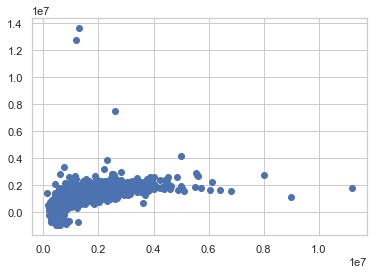

In [379]:
plt.scatter(y_test,l_regr.predict(X_test))

In [380]:


pred_test = l_regr.predict( X_test )
print('pred_test: ' , pred_test)

pred_test:  [1291067.76156977  981351.56405052  674850.57334295 ... 1068211.2001531
  909533.1851641   924648.0466078 ]


In [381]:
from sklearn.metrics import mean_squared_error, r2_score


print('R2 score: ' , r2_score(y_test , l_regr.predict( X_test ) ) )


R2 score:  0.41948324140927806


### MSE and RMSE

In [382]:
print('\nCalculate MAE with Y_test:',  round(metrics.mean_absolute_error( y_test , pred_test ),2) )

print('\nCalculate MSE with Y_test:', round(np.mean((y_test - l_regr.predict(X_test)) ** 2)),2)
# or MSE: print( metrics.mean_squared_error( y_test , pred_test ))


print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test )) ))


Calculate MAE with Y_test: 280806.52

Calculate MSE with Y_test: 252047064353 2

Calculate RMSE with Y_test: 502043.0


### Assumptions of Multivariable Linear Regression
For regression to work its magic, inputs to the model need to be consistent with four assumptions:

1. Assumption one: linear relationship
* Assumption two: multivariate normality
* Assumption three: homoscedasticity
* Assumption four: low multicollinearity ~ok

### 2.Assumption two: multivariate normality
The error from the model (calculated by subtracting the model-predicted values from the real outcome values) should be normally distributed. Since ordinary least squares regression models are fitted by choosing the parameters that best minimize error, skewness or outliers in the error can result in serious miss-estimations.

Outliers or skewness in error can often be traced back to outliers or skewness in data.

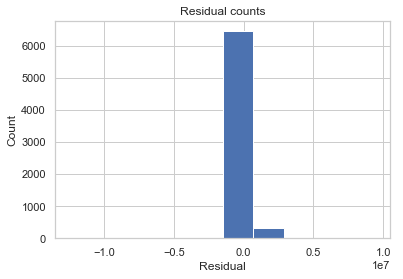

In [383]:
# Calculate the error, also called the residual.
# residual = actual - predicted
residual = y_test - l_regr.predict( X_test )


plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

### 3.Assumption three: homoscedasticity
The distribution of your error terms (its "scedasticity"), should be consistent for all predicted values, or homoscedastic.

For example, if your error terms aren't consistently distributed and you have more variance in the error for large outcome values than for small ones, then the confidence interval for large predicted values will be too small because it will be based on the average error variance. This leads to overconfidence in the accuracy of your model's predictions.

### Residual Plots

Residual plots are a good way to visualize the errors in your data.  

If you have done a good job then your data should be randomly scattered around line zero. If you see structure in your data, that means your model is not capturing something. 

Maye be there is a interaction between 2 variables that you are not considering, or may be you are measuring time dependent data. If you get some structure in your data, you should go back to your model and check whether you are doing a good job with your parameters.

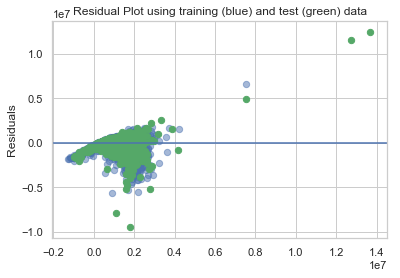

In [384]:
plt.scatter(l_regr.predict(X_train) , l_regr.predict( X_train ) - y_train , c = 'b' , s=40 , alpha = 0.5 )
plt.scatter(l_regr.predict(X_test) , l_regr.predict( X_test ) - y_test , c = 'g' , s=40 )
plt.hlines( y = 0 , xmin=0 , xmax = 50 )
plt.axhline( y=0 )
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()

## KNN - K-nearest-neighbor Regressor

In [385]:

from sklearn.neighbors import KNeighborsRegressor

In [386]:

# Build our model.
knn = KNeighborsRegressor(n_neighbors=10 , weights='distance' )
#---------------------
# fitting the model
knn.fit(X_train, y_train)

# predict the house price:
y_pred =  knn.predict(X_test)

Text(0,0.5,'Predictions')

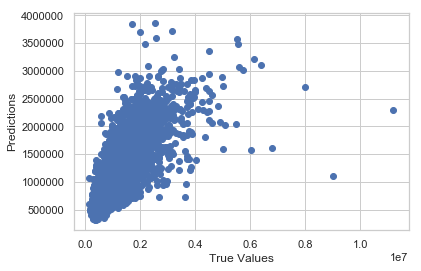

In [387]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [388]:
knn.score(X_test, y_test)

0.588454394825614

In [389]:
pred_test_KNN = knn.predict( X_test )
print('pred_test_KNN: ' , pred_test_KNN)

pred_test_KNN:  [1263784.78580298  978566.03089828  881743.05669529 ...  758000.
  461500.         1061310.51956105]


In [390]:

print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_KNN )) ))


Calculate RMSE with Y_test: 422710.0


## Random Forest regressor

In [391]:
from sklearn.ensemble import RandomForestRegressor

In [392]:
rf_regr = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf_regr.fit( X_train , y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [393]:
# Use the forest's predict method on the test data
predictions = rf_regr.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'AUD.')

# Print out the mean absolute error (RMSE)
print('RMSE [Root Mean Squared Error]: ', round(np.sqrt(metrics.mean_squared_error( y_test , predictions )),2) , 'AUD.')

Mean Absolute Error: 172001.49 AUD.
RMSE [Root Mean Squared Error]:  317254.17 AUD.


In [394]:
# Calculate the coefficient of determination R2.
# It provides a measure of how well future samples are likely to be predicted by the model:
R2_val = rf_regr.score(X_test,y_test)
print('R2 score: ' , R2_val)

R2 score:  0.7681816621067606


In [395]:
# Get numerical feature importances
importances = list(rf_regr.feature_importances_)

# Saving feature names for later use
feature_list = list(X_train.columns)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: BuildingArea         Importance: 0.18
Variable: Distance             Importance: 0.17
Variable: Lattitude            Importance: 0.13
Variable: Rooms                Importance: 0.12
Variable: Longtitude           Importance: 0.11
Variable: Type_enc             Importance: 0.1
Variable: Landsize             Importance: 0.06
Variable: month_year_enc       Importance: 0.03
Variable: Bathroom             Importance: 0.02
Variable: CouncilArea_enc      Importance: 0.02
Variable: Car                  Importance: 0.01
Variable: YearBuilt            Importance: 0.01
Variable: houseAge             Importance: 0.01
Variable: Regioncename_enc     Importance: 0.01
Variable: Method_enc           Importance: 0.01
Variable: season_enc           Importance: 0.01


In [396]:
pred_test_RF = rf_regr.predict( X_test )
print('pred_test_RF: ' , pred_test_RF)

pred_test_RF:  [ 846436.66666667  844909.8         800940.         ...  746100.
  456602.57142857 1061318.06666667]


In [397]:

print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_RF )) ))


Calculate RMSE with Y_test: 317254.0


## Ridge Regression:

In [398]:
from sklearn import linear_model

In [399]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print('R2 score: ' , ridgeregr.score(X_test, y_test))
origparams = ridgeregr.coef_
print('Ridge coefficients: ' , origparams)

R2 score:  0.3095250237558317
Ridge coefficients:  [ 237553.6740485  -271854.84077712   28198.72163959  -10230.34363047
   17283.2857848   156529.60480336  -38796.2934279    18341.95922693
  303144.92977532   38796.29342776  142796.49713626 -149048.22601494
   32665.53905676    7756.36515846   18730.09254305   60394.42499523]


In [400]:
pred_test_Ridge = ridgeregr.predict( X_test )
print('pred_test_Ridge: ' , pred_test_Ridge)

pred_test_Ridge:  [923967.23104774 991855.19327035 475506.90290865 ... 672379.48116695
 558093.90406912 836652.9087735 ]


In [401]:

print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_Ridge )) ))


Calculate RMSE with Y_test: 547529.0


## Lasso Regression:

In [402]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=0.001)
lass.fit(X_train, y_train)
print('R² score:')
print(lass.score(X_test, y_test))


origparams = np.append(lass.coef_, lass.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

R² score:
0.41948324231235057

Parameter estimates for the model with few features:
[ 2.05748137e+05 -2.73630258e+05  5.10200833e+04 -3.51193000e+03
  1.89342875e+04  1.61799677e+05 -7.65905058e+04 -8.99393049e+04
  1.50531037e+05 -1.30162396e+04  3.90025225e+04 -2.07979182e+05
 -3.43451544e+02 -1.48966443e+03  2.43036649e+03  1.22885717e+03
  1.00360491e+06]


In [403]:
pred_test_Lasso = lass.predict( X_test )
print('pred_test_Ridge: ' , pred_test_Lasso)

pred_test_Ridge:  [1291067.76524776  981351.56642945  674850.57817742 ... 1068211.20069662
  909533.18539644  924648.05219348]


In [404]:

print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_Lasso )) ))


Calculate RMSE with Y_test: 502043.0


## SVM Regression:

LinearSVR

In [405]:
from sklearn.svm import LinearSVR

try w/ higher values of C 10/100
dual = False

In [406]:
import time
start_time = time.time()

svr = LinearSVR(C=1000 , dual = True )
print( svr.fit(X_train,y_train) )

print("\n--- %s seconds ---" % (time.time() - start_time))

LinearSVR(C=1000, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

--- 0.17254948616027832 seconds ---


In [407]:

from sklearn.model_selection import cross_val_score

start_time = time.time()

print(cross_val_score( svr , X_train, y_train , cv=5))

print("\n--- %s seconds ---" % (time.time() - start_time))

[0.48818592 0.48553022 0.49643407 0.50989297 0.50034482]

--- 0.4914090633392334 seconds ---


In [408]:
start_time = time.time()

print('R2 coeff: %.4f' %svr.score( X_test , y_test ))

print("\n--- %s seconds ---" % (time.time() - start_time))

R2 coeff: 0.3615

--- 0.0045239925384521484 seconds ---


In [409]:
pred_test_SVR = svr.predict( X_test )
print('pred_test_Ridge: ' , pred_test_SVR)

pred_test_Ridge:  [1087211.79055561  858621.58382115  643984.00867501 ...  864609.66058792
  670129.71987088  828181.55941715]


In [410]:

print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_SVR )) ))


Calculate RMSE with Y_test: 526503.0


## Gradient Boosting Model - Regression _ baseline model:

In [411]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 5,
          'loss': 'ls' 
                      # ‘ls’ refers to least squares regression. 
                      # ‘lad’ (least absolute deviation) is a highly robust loss function solely based on order information of the input variables. 
                      # ‘huber’ is a combination of the two. 
                      # ‘quantile’ allows quantile regression (use alpha to specify the quantile).
         }

# Initialize and fit the model.
rgr = ensemble.GradientBoostingRegressor(**params)
rgr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [412]:
# predict_train = rgr.predict(X_train)
predict_test = rgr.predict(X_test)

predict_test



array([1013246.03141841,  860022.6384543 ,  859083.06502667, ...,
        759690.39584302,  540689.99379884,  925889.28375916])

In [413]:
print(cross_val_score( rgr , X_train, y_train , cv=5))

[0.79775655 0.81281014 0.80716278 0.81410224 0.78570464]


In [414]:
#Let's get some stats. #One of the benefits of growing trees is that we can understand how important each of the features are 
print ("Feature Importances" )
print (rgr.feature_importances_ )
print 
#Let's print the R-squared value for train/test. This explains how much of the variance in the data our model is 
#able to decipher. 

print ("\nR-squared for Test: %.4f" %rgr.score(X_test, y_test) )


Feature Importances
[0.07668149 0.11865241 0.03097567 0.02357732 0.11794531 0.09452424
 0.02849869 0.14940994 0.15741072 0.0289973  0.00560723 0.03936182
 0.02106631 0.0270737  0.06082175 0.0193961 ]

R-squared for Test: 0.7831


In [415]:
pred_test_GBM = rgr.predict( X_test )
print('pred_test_GBM: ' , pred_test_GBM)


print('\nCalculate RMSE with Y_test:',  round(np.sqrt(metrics.mean_squared_error( y_test , pred_test_GBM )) ))

pred_test_GBM:  [1013246.03141841  860022.6384543   859083.06502667 ...  759690.39584302
  540689.99379884  925889.28375916]

Calculate RMSE with Y_test: 306874.0


### Create a function for GBM with CV:
Lets define a function which will help us create GBM models and perform cross-validation.

In [416]:
def modelfit(alg, dtrain, predictors, trainY , testX , target_y , performCV=True, printFeatureImportance=True, cv_folds=5):
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], trainY)
        
    #Predict on test set:
    test_predictions = alg.predict( testX[predictors] )

    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictors], trainY , cv=cv_folds, scoring='r2') 
    
    #Print model report:
    print ("\nModel Report:\n-------------")
    print ("R2 : %.4g" % metrics.r2_score( target_y, test_predictions ) )

    
    if performCV:
        print ("CV Score : Mean_ %.7g | Std_ %.7g | Min_ %.7g | Max_ %.7g" 
                   % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)
                     )
              )
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

Lets start by creating a <b>baseline model</b>. 

Typically, a good baseline can be a GBM model with default parameters, i.e. without any tuning. 

Lets find out what it gives:


Model Report:
-------------
R2 : 0.7834
CV Score : Mean_ 0.8048056 | Std_ 0.009518708 | Min_ 0.7867836 | Max_ 0.8136574


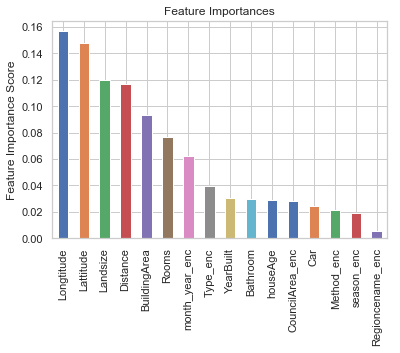

In [417]:
#Choose all predictors except target & IDcols
trainX = X_train
trainY = y_train

testX = X_test
target_y = y_test 
predictors = X_train.columns

gbm0 = ensemble.GradientBoostingRegressor(**params , random_state=10)
modelfit(gbm0, trainX, predictors , trainY , testX , target_y )

-------------------

# The top 2 models with best scores are:
- Random Forest: R-squared = 0.8076
- GBM Regressos: R-squared = 0.8031

# Random forest

### Hyperparameter tunning:

In [142]:
print('Parameters currently in use:\n')
rf_regr.get_params()

Parameters currently in use:



{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [143]:
print(cross_val_score(rf_regr, X_train, y_train, cv=5))

[0.77525257 0.7807891  0.78093744 0.77726158 0.75972288]


We will try adjusting the following set of hyperparameters:

    n_estimators = number of trees in the foreset
    max_features = max number of features considered for splitting a node
    max_depth = max number of levels in each decision tree
    min_samples_split = min number of data points placed in a node before the node is split
    min_samples_leaf = min number of data points allowed in a leaf node
    bootstrap = method for sampling data points (with or without replacement)

### Using Scikit-Learn’s RandomizedSearchCV method, 
we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.



In [174]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

random_grid

{'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 287, 525, 762, 1000]}

In [175]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores


import time
start_time = time.time()

rf_random = RandomizedSearchCV(estimator = rf_regr
                               , param_distributions = random_grid
                               , n_iter = 100
                               , cv = 3
                               , verbose=2
                               , random_state=42
                               , n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

print("\n--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.9min finished



--- 2251.6192750930786 seconds ---


In [176]:
rf_random.best_params_ 

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

### Grid Search with Cross Validation:

In [135]:
#Choose all predictors except target

import time
start_time = time.time()

predictors = X_train.columns

param_test1 = {'n_estimators':range(20,500,20)}

param_default1 = {'bootstrap': True
                 ,'max_depth': 3
                 ,'max_features': 'auto'
                 ,'min_samples_leaf': 1
                 ,'min_samples_split': 2 
                }

gsearch1 = GridSearchCV(estimator = RandomForestRegressor(**param_default1)
                        , param_grid = param_test1
                        , scoring='r2'
                        , n_jobs=4
                        , iid=False
                        , cv=5                         
                       )

gsearch1.fit( X_train , y_train )

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 648.3266577720642 seconds ---


In [136]:
print('Parameters currently in use:\n')
gsearch1.get_params()

Parameters currently in use:



{'cv': 5,
 'error_score': 'raise',
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': N

In [137]:
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
        print("Mean of: %0.5f and std: (+/-%0.05f) for %r"
              % (mean, std * 2, params))

Mean of: 0.76304 and std: (+/-0.02960) for {'n_estimators': 20}
Mean of: 0.76538 and std: (+/-0.02978) for {'n_estimators': 40}
Mean of: 0.76885 and std: (+/-0.02944) for {'n_estimators': 60}
Mean of: 0.76933 and std: (+/-0.03015) for {'n_estimators': 80}
Mean of: 0.77010 and std: (+/-0.03185) for {'n_estimators': 100}
Mean of: 0.77007 and std: (+/-0.03219) for {'n_estimators': 120}
Mean of: 0.77077 and std: (+/-0.03372) for {'n_estimators': 140}
Mean of: 0.77220 and std: (+/-0.03224) for {'n_estimators': 160}
Mean of: 0.77181 and std: (+/-0.03145) for {'n_estimators': 180}
Mean of: 0.77197 and std: (+/-0.03178) for {'n_estimators': 200}
Mean of: 0.77184 and std: (+/-0.03024) for {'n_estimators': 220}
Mean of: 0.77199 and std: (+/-0.03225) for {'n_estimators': 240}
Mean of: 0.77184 and std: (+/-0.03055) for {'n_estimators': 260}
Mean of: 0.77213 and std: (+/-0.02842) for {'n_estimators': 280}
Mean of: 0.77204 and std: (+/-0.03137) for {'n_estimators': 300}
Mean of: 0.77230 and std: (+/

In [138]:

print('best param: ',gsearch1.best_params_)
print('best score R-squared: ',gsearch1.best_score_)

best param:  {'n_estimators': 480}
best score R-squared:  0.7724025952332146


### Test2 GridSearchCV:
As n-estimators is exactly at the upper limit of the tested range, we have to test some more

In [180]:
range(50,150,3)

range(50, 150, 3)

In [192]:
#Choose all predictors except target

import time
start_time = time.time()

predictors = X_train.columns

param_test2 = {'n_estimators':range(20,150,20)}

param_default2 = {'bootstrap': True
                 ,'max_depth': 30
                 ,'max_features': 'sqrt'
                 ,'min_samples_leaf': 1
                 ,'min_samples_split': 2 
                }

gsearch2 = GridSearchCV(estimator = RandomForestRegressor(**param_default2)
                        , param_grid = param_test2
                        , scoring='r2'
                        , n_jobs=4
                        , iid=False
                        , cv=5                         
                       )

gsearch2.fit( X_train , y_train )

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 30.123104572296143 seconds ---


In [193]:
means = gsearch2.cv_results_['mean_test_score']
stds  = gsearch2.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gsearch2.cv_results_['params']):
        print("Mean of: %0.5f and std: (+/-%0.05f) for %r"
              % (mean, std * 2, params))

Mean of: 0.77842 and std: (+/-0.02206) for {'n_estimators': 20}
Mean of: 0.78440 and std: (+/-0.02747) for {'n_estimators': 40}
Mean of: 0.78834 and std: (+/-0.02463) for {'n_estimators': 60}
Mean of: 0.78817 and std: (+/-0.02183) for {'n_estimators': 80}
Mean of: 0.78998 and std: (+/-0.02132) for {'n_estimators': 100}
Mean of: 0.79024 and std: (+/-0.02357) for {'n_estimators': 120}
Mean of: 0.79041 and std: (+/-0.02345) for {'n_estimators': 140}


In [194]:

print('best param: ',gsearch2.best_params_)
print('best score R-squared: ',gsearch2.best_score_)

best param:  {'n_estimators': 140}
best score R-squared:  0.7904090005319322


We can take 'n_estimators': 640 and proceed to the next parameter:

### Second param tuning:

Use parameters from RandomizeSearchCV:

    {'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 800
    }

In [199]:
#Choose all predictors except target

import time
start_time = time.time()

predictors = X_train.columns

param_test3 = {  'max_depth': [1,30,40,60]
                 ,'max_features': ['sqrt']
                 ,'min_samples_leaf': [1]
                 ,'min_samples_split': [5 ]
                 ,'n_estimators':[100,500,1000]}

gsearch3 = GridSearchCV(estimator = RandomForestRegressor()
                        , param_grid = param_test3
                        , scoring='r2'
                        , n_jobs=4
                        , iid=False
                        , cv=5                         
                       )

gsearch3.fit( X_train , y_train )

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 194.59317660331726 seconds ---


In [200]:
means = gsearch3.cv_results_['mean_test_score']
stds  = gsearch3.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gsearch3.cv_results_['params']):
        print("Mean of: %0.5f and std: (+/-%0.05f) for %r"
              % (mean, std * 2, params))

Mean of: 0.20227 and std: (+/-0.01572) for {'min_samples_split': 5, 'max_depth': 1, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.20326 and std: (+/-0.01460) for {'min_samples_split': 5, 'max_depth': 1, 'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.20286 and std: (+/-0.01389) for {'min_samples_split': 5, 'max_depth': 1, 'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.79387 and std: (+/-0.01734) for {'min_samples_split': 5, 'max_depth': 30, 'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.79457 and std: (+/-0.01881) for {'min_samples_split': 5, 'max_depth': 30, 'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.79521 and std: (+/-0.01791) for {'min_samples_split': 5, 'max_depth': 30, 'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Mean of: 0.79193 and std: (+/-0.01866) for {'min_samples_split': 5, 'max_depth': 40

In [203]:
gsearch3.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [202]:

print('best param: ',gsearch3.best_params_)
print('\nbest score R-squared: ',gsearch3.best_score_)

best param:  {'min_samples_split': 5, 'max_depth': 30, 'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 'sqrt'}

best score R-squared:  0.795208338264402


In [198]:
print('Parameters currently in use:\n')
gsearch3.get_params()

Parameters currently in use:



{'cv': 5,
 'error_score': 'raise',
 'estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0, warm_start=False),
 'estimator__bootstrap': True,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': 1,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'fit_params': N

# Gradient Boosting

### Hyperparameter tunning:

In [204]:
print('Parameters currently in use:\n')
rgr.get_params()

Parameters currently in use:



{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [155]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt' ]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

# Create the random grid
random_grid_gb = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }

random_grid_gb

{'max_depth': [5, 14, 23, 32, 41, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 275, 500]}

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores


import time
start_time = time.time()

gb_random = RandomizedSearchCV(estimator = rgr #taken from initial fitting
                               , param_distributions = random_grid_gb
                               , n_iter = 50
                               , cv = 3
                               , verbose=2
                               , random_state=42
                               , n_jobs = -1)

# Fit the random search model
gb_random.fit(X_train, y_train)

print("\n--- %s seconds ---" % (time.time() - start_time))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 11.0min


In [427]:
#Choose all predictors except target

import time
start_time = time.time()

predictors = X_train.columns

param_test1 = {'n_estimators':[100]
              ,'max_depth' : [9]
              }

gsearch1 = GridSearchCV(estimator = ensemble.GradientBoostingRegressor(
    
                            learning_rate=0.1
                            #,loss = 'ls' 
                            ,min_samples_leaf=4
                            ,min_samples_split=2
                            
                            #,max_depth= 9
                            ,max_features='sqrt'
                            ,subsample=1
                            ,random_state=42
                            )
                            , 
                                param_grid = param_test1
                                , scoring='r2'
                                #, n_jobs=4
                                #, iid=False
                                , cv=5 
                       )
gsearch1.fit( X_train , y_train )

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 10.107353210449219 seconds ---


In [428]:
means = gsearch1.cv_results_['mean_test_score']
stds  = gsearch1.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
        print("Mean of: %0.5f and std: (+/-%0.05f) for %r"
              % (mean, std * 2, params))

Mean of: 0.81047 and std: (+/-0.01778) for {'n_estimators': 100, 'max_depth': 9}


In [429]:
print('best param: ',gsearch1.best_params_)
print('best score R-squared w/ CV: %0.5f' %gsearch1.best_score_)

best param:  {'n_estimators': 100, 'max_depth': 9}
best score R-squared w/ CV: 0.81047


In [436]:


# extract the numerical values of feature importance from the grid search
importances = gsearch1.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X_train.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df_importance = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df_importance['importance'])
feature= list(df_importance['feature'])

#see df
print(df_importance)

    importance           feature
0         0.13        Longtitude
1         0.13         Lattitude
2         0.12          Distance
3         0.09      BuildingArea
4         0.09          Landsize
5         0.08             Rooms
6         0.06    month_year_enc
7         0.05         YearBuilt
8         0.05   CouncilArea_enc
9         0.04          houseAge
10        0.04          Type_enc
11        0.03          Bathroom
12        0.03               Car
13        0.02        Method_enc
14        0.02        season_enc
15        0.02  Regioncename_enc


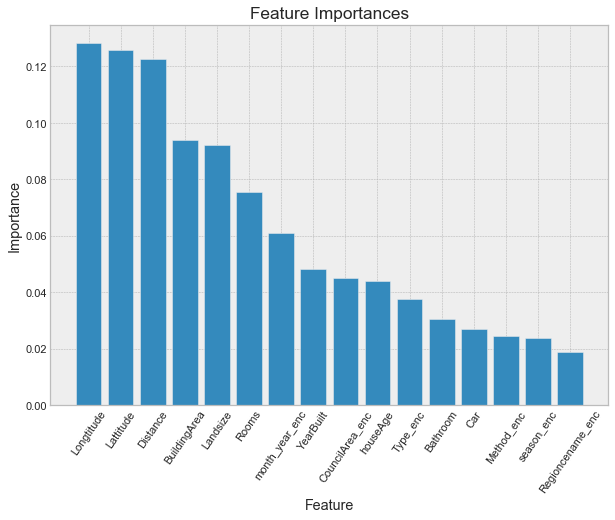

In [457]:
# Set the style
#plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(10,7))
plt.bar(x_values, importance, orientation = 'vertical' )
# Tick labels for x axis
plt.xticks(x_values, feature, rotation= 55 )
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

### Mean Absolute Percentage Error (MAPE):

Text(0.5,0,'Tree depth')

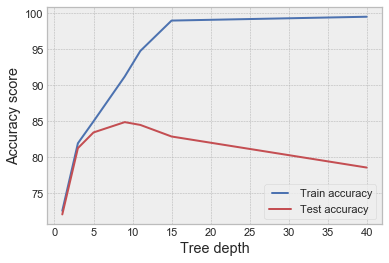

In [460]:
import time
start_time = time.time()

#max_depths = np.linspace(1, 50, 50, endpoint=True)
max_depths = [1,3,5,9,11,15,40]


train_results = []
test_results = []

for i in max_depths:
    dt = ensemble.GradientBoostingRegressor(
            max_depth=i
            )
    dt.fit( X_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(X_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(X_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')


print("\n--- %s seconds ---" % (time.time() - start_time))

### R-squared:


--- 40.48797035217285 seconds ---


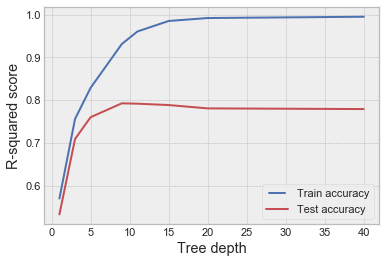

In [459]:
import time
start_time = time.time()

#max_depths = np.linspace(1, 50, 50, endpoint=True)
max_depths = [1,3,5,9,11,15,20 , 40]


train_results = []
test_results = []

for i in max_depths:
    dt = ensemble.GradientBoostingRegressor(
            max_depth=i
            ,n_estimators=100
            ,learning_rate=0.1
            #,loss = 'ls' 
            ,min_samples_leaf=4
            ,min_samples_split=2
            
            #,max_depth= 9
            ,max_features='sqrt'
            ,subsample=1
            ,random_state=42
            )
    dt.fit( X_train, y_train)    

    #compute accuracy for train data 
    train_results.append(dt.score(X_train, y_train))    

        
    #now again for test data
    test_results.append(dt.score(X_test, y_test))
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')


plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('R-squared score')
plt.xlabel('Tree depth')


print("\n--- %s seconds ---" % (time.time() - start_time))

[Go back to top index](#top)

## Neural Network regression:

In [115]:
from sklearn.neural_network import MLPRegressor


from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest

from sklearn.metrics import r2_score

In [121]:
print(df_price_nonnull_scaled.shape)
df_price_nonnull_scaled.head()

(27182, 31)


,Suburb,Address,Type,Method,SellerG,Date,Postcode,CouncilArea,Regionname,Propertycount,Sub_Region,date_time,season,month_year,Rooms,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,houseAge,Price,Regioncename_enc,Type_enc,Method_enc,CouncilArea_enc,month_year_enc,season_enc
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-03-12,winter,2016-03,-1.04,...,-1.08,-1.01,-0.06,-0.55,-1.73,0.09,0.01,1.73,1480000.00,2,0,2,31,1,3
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-02,spring,2016-04,-1.04,...,-1.08,-1.99,-0.08,-0.77,-1.73,-0.00,-0.04,1.73,1035000.00,2,0,2,31,2,1
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04,0.01,...,0.09,-1.99,-0.08,0.05,-1.73,-0.02,-0.03,1.73,1465000.00,2,0,5,31,14,1
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2017-04-03,spring,2017-04,0.01,...,0.09,-1.01,-0.10,-0.55,-1.73,0.12,-0.01,1.73,850000.00,2,0,0,31,14,1
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,3067.00,Yarra City Council,Northern Metropolitan,4019.00,AbbotsfordNorthern Metropolitan,2016-04-06,spring,2016-04,1.06,...,-1.08,-0.04,-0.09,-0.04,1.64,0.01,-0.03,-1.64,1600000.00,2,0,7,31,2,1


In [122]:
df_price_nonnull_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 31 columns):
Suburb              27182 non-null category
Address             27182 non-null category
Type                27182 non-null category
Method              27182 non-null category
SellerG             27182 non-null category
Date                27182 non-null category
Postcode            27182 non-null category
CouncilArea         27182 non-null category
Regionname          27182 non-null category
Propertycount       27182 non-null category
Sub_Region          27182 non-null object
date_time           27182 non-null datetime64[ns]
season              27182 non-null category
month_year          27182 non-null category
Rooms               27182 non-null float64
Distance            27182 non-null float64
Bathroom            27182 non-null float64
Car                 27182 non-null float64
Landsize            27182 non-null float64
BuildingArea        27182 non-null float64
YearBuilt    

In [125]:
# Create Dummy features instead of using LabelEncoders:

Regionname  = pd.get_dummies(df_price_nonnull_scaled.Regionname)
Type        = pd.get_dummies(df_price_nonnull_scaled.Type)
Method      = pd.get_dummies(df_price_nonnull_scaled.Method)
CouncilArea = pd.get_dummies(df_price_nonnull_scaled.CouncilArea)
month_year  = pd.get_dummies(df_price_nonnull_scaled.month_year)
season      = pd.get_dummies(df_price_nonnull_scaled.season)


### Create list of categorical&object columns  to exclude them from train data. 

> Transform to list and ad target column.

In [131]:
object_cols = df_price_nonnull_scaled.select_dtypes(include = ['category','object','datetime64[ns]']).columns
list(object_cols)

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'Sub_Region',
 'date_time',
 'season',
 'month_year']

In [134]:
# Remove Encoded features as no longer needed:
remove_enc = df_price_nonnull_scaled.select_dtypes(include = ['int8']).columns
list(remove_enc)

['Regioncename_enc',
 'Type_enc',
 'Method_enc',
 'CouncilArea_enc',
 'month_year_enc',
 'season_enc']

In [135]:
object_cols = list(object_cols)
object_cols.extend(['Price'])
object_cols.extend(remove_enc)

In [136]:
object_cols

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'Postcode',
 'CouncilArea',
 'Regionname',
 'Propertycount',
 'Sub_Region',
 'date_time',
 'season',
 'month_year',
 'Price',
 'Price',
 'Regioncename_enc',
 'Type_enc',
 'Method_enc',
 'CouncilArea_enc',
 'month_year_enc',
 'season_enc']

In [137]:
#X_50 = art_50.drop(['Department', 'DateAcquired', 'Artist', 'Nationality', 'Date'], 1)

df_price_nonnull_scaled = pd.concat([df_price_nonnull_scaled, Regionname ,Type,Method,CouncilArea,month_year ,season], axis=1)

In [144]:
from sklearn.model_selection import train_test_split

import time
start_time = time.time()


X_new = df_price_nonnull_scaled.drop(object_cols , axis = 1)
y_new = df_price_nonnull_scaled.Price

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42)

print("\n--- %s seconds ---" % (time.time() - start_time))


--- 0.015040159225463867 seconds ---


In [145]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(20386, 95) (20386,)
(6796, 95) (6796,)


In [146]:
print(X_new.shape,'\n')
X_new.info()

(27182, 95) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27182 entries, 0 to 27181
Data columns (total 95 columns):
Rooms                             27182 non-null float64
Distance                          27182 non-null float64
Bathroom                          27182 non-null float64
Car                               27182 non-null float64
Landsize                          27182 non-null float64
BuildingArea                      27182 non-null float64
YearBuilt                         27182 non-null float64
Lattitude                         27182 non-null float64
Longtitude                        27182 non-null float64
houseAge                          27182 non-null float64
Eastern Metropolitan              27182 non-null uint8
Eastern Victoria                  27182 non-null uint8
Northern Metropolitan             27182 non-null uint8
Northern Victoria                 27182 non-null uint8
South-Eastern Metropolitan        27182 non-null uint8
Southern Metropolitan           

In [147]:
print(X_train.shape)
X_train.head()

(20386, 95)


,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,houseAge,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-06,2018-10,fall,spring,summer,winter
24352,1.06,0.99,0.09,-0.04,-0.13,0.71,0.93,1.30,-2.19,-0.93,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
18405,1.06,0.31,1.25,-0.04,-0.13,0.11,0.05,0.02,1.35,-0.05,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
14771,0.01,-0.60,0.09,-0.04,0.02,0.22,-1.73,-0.81,0.06,1.73,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
24113,0.01,-0.72,-1.08,-0.04,-0.00,-0.37,-0.25,0.02,-1.04,0.25,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
14906,-1.04,-0.42,1.25,0.94,-0.13,-0.30,-0.25,0.74,0.06,0.25,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
# Create a function to fit and cross validation:
def run_mlp(X,Y, sizes):
    mlp = MLPRegressor(
                        hidden_layer_sizes=(sizes)
                        , activation='relu'
                        , solver='lbfgs'
    # Note: The default solver ‘adam’ works pretty well on relatively large datasets 
    # (with thousands of training samples or more) in terms of both training time and validation score. 
    # For small datasets, however, ‘lbfgs’ can converge faster and perform better.
                        )
    mlp.fit(X, Y)
    print('Hidden Layer Sizes: {sizes}'.format(sizes=sizes))
    print('Accuracy score: ',mlp.score(X, Y))
    
    scores = cross_val_score(mlp, X, Y, cv=5)
    print('Cross Val Scores: {scores}'.format(scores=scores))
    print('\nCross Val Mean: ',scores.mean())
    



### Neural Net using initial dataframe which had categorical columns label encoded:

In [118]:
import time
start_time = time.time()

pipe = Pipeline([
    ('feat', VarianceThreshold()),
        #Feature selector that removes all low-variance features. p*(1-p)
        #This feature selection algorithm looks only at the features (X)
        #, not the desired outputs (y), and can thus be used for unsupervised learning.
        # It removes all features that are above the threshold in more than 80% of the samples.
    ('mlp', MLPRegressor(solver='lbfgs' , max_iter =200 ))
        # number of epochs (how many times each data point will be used)
])

param_grid = [
    {
        'feat__threshold': [(.8 * (1 - .8)),(.6 * (1 - .6)),(.4 * (1 - .4))],
        'mlp__hidden_layer_sizes': [[10,10,10],[100]]
    }
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

prediction = grid.predict(X_test)
print(r2_score(y_test, prediction))

print("\n--- %s seconds ---" % (time.time() - start_time))

{'feat__threshold': 0.24, 'mlp__hidden_layer_sizes': [10, 10, 10]}
0.4613834324325372

--- 56.31967520713806 seconds ---


### Neural Net after using get_dummy for some categorical columns :

In [149]:
import time
start_time = time.time()

pipe = Pipeline([
    ('feat', VarianceThreshold()),
        #Feature selector that removes all low-variance features. p*(1-p)
        #This feature selection algorithm looks only at the features (X)
        #, not the desired outputs (y), and can thus be used for unsupervised learning.
        # It removes all features that are above the threshold in more than 80% of the samples.
    ('mlp', MLPRegressor(solver='lbfgs' , max_iter =200 ))
        # number of epochs (how many times each data point will be used)
])

param_grid = [
    {
        'feat__threshold': [(.8 * (1 - .8)),(.6 * (1 - .6)),(.4 * (1 - .4))],
        'mlp__hidden_layer_sizes': [[10,10,10],[100,100],[100]]
    }
]

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

prediction = grid.predict(X_test)
print(r2_score(y_test, prediction))

print("\n--- %s seconds ---" % (time.time() - start_time))

{'feat__threshold': 0.15999999999999998, 'mlp__hidden_layer_sizes': [100, 100]}
0.6852883171957846

--- 189.97517204284668 seconds ---
